<center>
    <h1 style="color: black;">PREDICTING AIRBNB PRICES AND DEVELOPING A MODEL TO IDENTIFY GREAT VALUE LISTINGS</h1>
    <h3>Reshma Rajan</h3>
</center>

<div style="background-color:#38761d;  color:white; padding:20px">
<h2>  PRACTICAL MOTIVATION </h2>
</div>

AirBnb revolutionized the travel industry by offering travelers comfortable and convenient accommodations, as well as providing property owners with a profitable avenue for renting out their spaces. Yet, the challenge for potential hosts lies in determining the best type of property to invest in to maximize their earnings on AirBnb. On the flip side, travelers seeking budget-friendly options with specific amenities, such as complimentary parking, often struggle to sift through the plethora of listings to find the perfect match. The pricing of AirBnb listings is multifaceted, influenced by a variety of factors. Our goal is to pinpoint the key elements that dictate pricing, particularly those prevalent in higher-end listings. By identifying these crucial features, prospective hosts can strategically equip their properties to command premium rates without deterring potential guests. Simultaneously, travelers can gain insight into which factors to prioritize to uncover listings that meet their preferences and budget constraints.

The challenge for hosts is to determine the optimal property features to maximize their earnings, while travelers seek to find budget-friendly options with desired amenities. Hence this project further aims to develop a predictive model to identify Airbnb listings considered as great value, focusing on key factors such as price, amenities, and guest reviews. By understanding the elements that dictate pricing and value, hosts can enhance their properties' attractiveness and profitability, and guests can make informed choices that align with their preferences and budget constraints.

<div style="background-color:#38761d;  color:white; padding:20px">
<h2> 1. BUSINESS OBJECTIVES </h2>
</div>

* To understand the factors and features of a listing that make an AirBnb listing more expensive
* Create a predictive model to predict the price of the listing using important features
* Develop a predictive model to identify Airbnb listings considered as great value.

<div style="background-color:#38761d;  color:white; padding:20px">
<h2> 2. TECHNICAL OBJECTIVES </h2>
</div>

* Data Understanding - Import the datasets and understand the features given in the dataset
* Data Preparation - Deal with null values, identification of outliers and its removal, dropping the features that are not important for price prediction, creating dummy varaibles for certain features to include in the model,dropping features that won't be available during the prediction, removing duplicate rows,checking the multicolliearity of different features and creating different visulaizations to get the big picture of data.
* Modelling - Creating the X and y dataset for prediction. Split the dataset into test(20%) and train(80%), standardize the X dataframe.
* Lasso Regression -Set the parameters for lasso regression, Fit the model, predict with test dataset and asses the model accuracy, finetune the model using grid search and select the important features using feature selection.
* Ridge Regression - Using the features obtained from Lasso regression, create a predictive model for price of the listing following the same methods done in Lasso regression.
* create a classification model for the feature variable 'great_value' using logistic regression , decision tree and random forrest and choose the best model.

<div style="background-color:#38761d;  color:white; padding:20px">
<h2> 3. IMPORT LIBRARIES </h2>
</div>

Import the following libraries: 
* `import numpy as np`
* `import pandas as pd`
* `import matplotlib`
* `import matplotlib.pyplot as plt`
* `import seaborn as sns`
* `import sklearn`


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

pd.set_option('display.max_columns',500) 

plt.style.use('seaborn-colorblind') #a style that can be used for plots

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_891/24950203.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind') #a style that can be used for plots


<div style="background-color:#38761d;  color:white; padding:20px">
<h2> 4.  IMPORT DATA </h2>
</div>

* Datasets available from airbnb are:
* `hosts.csv - It includes all the details of the host who have listings in Airbnb. The features include name of the host, their neighborhood, host_response_rate, identification validation method ,room_type of host's listing etc`
* `amenitiesdummies_top87.csv - It consist of all the dummy variable created for 6144 distinct listings in the Nashville region`
* ``
* `calendar.csv.gz - It has the availability of each of the 6144 listings including all days from 2021-02-20 to 2022-02-20 `
* `listings.csv.gz - It has all the details of the 6144 listings inclding its availability and details of the respective host`
* `cal_listings.csv.gz - Includes the listings and calendar dates in one file`
* `listings_review.csv.gz - Includes th elistings that have a review_scores_value(non-null).`



In [2]:
#importing hosts.csv
df_host = pd.read_csv('data/hosts.csv', index_col = 0, header = 0)
df_host.head(2) 

,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,response_few_days,response_few_hours,response_within_day,response_within_hour,host_id,reviews_per_month,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,Marilyn,4702.0,NaN,NaN,0,NaN,1.0,1.0,1,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1147,0.00,0,0,1,0
1,Jack,4538.0,NaN,NaN,0,NaN,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,6383,0.14,1,0,0,0


In [3]:
#importing amenitiesdummies_top87.csv
df_amen = pd.read_csv('data/amenitiesdummies_top87.csv', index_col = 0, header = 0)
df_amen.head(2)

,Wifi,Smokealarm,Heating,Airconditioning,TV,Essentials,Hairdryer,Iron,Hangers,Kitchen,Longtermstaysallowed,Shampoo,Freeparkingonpremises,Coffeemaker,Dryer,Washer,Hotwater,Carbonmonoxidealarm,Dedicatedworkspace,Refrigerator,Fireextinguisher,Microwave,Dishesandsilverware,Cookingbasics,Oven,Privateentrance,Stove,Bedlinens,Dishwasher,Patioorbalcony,Firstaidkit,Extrapillowsandblankets,Freestreetparking,CableTV,Keypad,Gardenorbackyard,Bathtub,Luggagedropoffallowed,BBQgrill,Pool,Gym,Smartlock,Showergel,Bakingsheet,Elevator,Indoorfireplace,Room-darkeningshades,Singlelevelhome,Pack\u2019nPlay/travelcrib,Lockbox,Freezer,Bodysoap,Breakfast,Ceilingfan,Conditioner,Ethernetconnection,Lockonbedroomdoor,Children\u2019sbooksandtoys,Hottub,Highchair,Barbecueutensils,Keurigcoffeemachine,Paidparkingonpremises,Paidparkingoffpremises,Babysitterrecommendations,Bathroomessentials,Bedroomcomforts,Wineglasses,Toaster,Selfcheck-in,Cleaningbeforecheckout,Diningtable,Outdoorfurniture,Children\u2019sdinnerware,Cleaningproducts,EVcharger,Fullkitchen,Pocketwifi,Buildingstaff,Outletcovers,Portablefans,Crib,Laundromatnearby,Hostgreetsyou,Babysafetygates,Gameconsole,Outdoordiningarea
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
#importing calendar.csv.gz
df_calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip', index_col=None, header=0, sep=',', quotechar='"')
df_calendar.tail(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2242780,48107192,2022-02-19,t,$32.00,$32.00,90.0,365.0
2242781,48107192,2022-02-20,t,$32.00,$32.00,90.0,365.0


In [5]:
#importing listings.csv.gz
df_list = pd.read_csv('data/listings.csv.gz', compression='gzip', index_col=None, header=0, sep=',', quotechar='"')
df_list.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69
1,25613,https://www.airbnb.com/rooms/25613,20210219004252,2021-02-20,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17826,-86.74162,Private room in house,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",$75.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,63,2021-02-20,510,4,0,2010-04-25,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,3.87


In [6]:
# importing cal_listings.csv.gz
df_cal_listings = pd.read_csv('data/cal_listings.csv.gz', compression='gzip', index_col=None, header=0, sep=',', quotechar='"')
df_cal_listings.head(2)

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,cal_available,cal_price,cal_minimum_nights,cal_maximum_nights,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2021,year_2022
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,"Nashville, Tennessee, United States",36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,40.0,30.0,365.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,6422,Nashville Charm,30 day or more rental during COVID. S

In [7]:
# importing listings_review.csv.gz
df_listings_rev = pd.read_csv('data/listings_review.csv.gz', compression='gzip', index_col=None, header=0, sep=',', quotechar='"')
df_listings_rev.head(2)

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,"Nashville, Tennessee, United States",36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,25613,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,95811,Nell,4102.0,100%,100%,1,NaN,1.0,1.0,1,1,"Nashville, Tennessee, United States",36.17826,-86.74162,Private room in house,Private room,2,1.0,1.0,1.0,75.0,2,30,1,0,0,0,63,510,4,0,4064.0,453.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,3.87,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1

<div style="background-color:#38761d;  color:white; padding:20px">
<h2> 5. DATA EXPLORATION AND CLEANSING</h2>
</div>

In [8]:
# viewing the neighbourhood names
df_listings_rev['neighbourhood'].value_counts()

Nashville, Tennessee, United States               4065
Goodlettsville, Tennessee, United States            18
Brentwood, Tennessee, United States                  5
Berry Hill, Tennessee, United States                 5
Madison, Tennessee, United States                    3
Antioch, Tennessee, United States                    3
Pegram, Tennessee, United States                     2
Nashville , Tennessee, United States                 2
Nashville , Tn, United States                        1
Whites Creek,TN , Tennessee, United States           1
Nashville, United States                             1
Greenbrier, Tennessee, United States                 1
Hermitage , Tennessee, United States                 1
United States                                        1
Nashville\nHermitage, Tennessee, United States       1
Madison , Tennessee, United States                   1
Old Hickory, Tennessee, United States                1
Name: neighbourhood, dtype: int64

In [9]:
#correcting Nashville , Tennessee, United States
values_to_replace = ['Nashville , Tennessee, United States', 'Nashville , Tn, United States', 
                     'Nashville, United States', 'Nashville\nHermitage, Tennessee, United States', 
                     'United States']

df_listings_rev['neighbourhood'] = df_listings_rev['neighbourhood'].replace(values_to_replace, 'Nashville, Tennessee, United States')


# removing ' Tennessee, United States' from all neighbourhood values
df_listings_rev['neighbourhood'] = df_listings_rev['neighbourhood'].str.replace(', Tennessee, United States', '', regex=False)


In [10]:
# viewing the neighbourhood names
df_listings_rev['neighbourhood'].value_counts()

Nashville           4071
Goodlettsville        18
Brentwood              5
Berry Hill             5
Madison                3
Antioch                3
Pegram                 2
Madison                1
Hermitage              1
Greenbrier             1
Whites Creek,TN        1
Old Hickory            1
Name: neighbourhood, dtype: int64

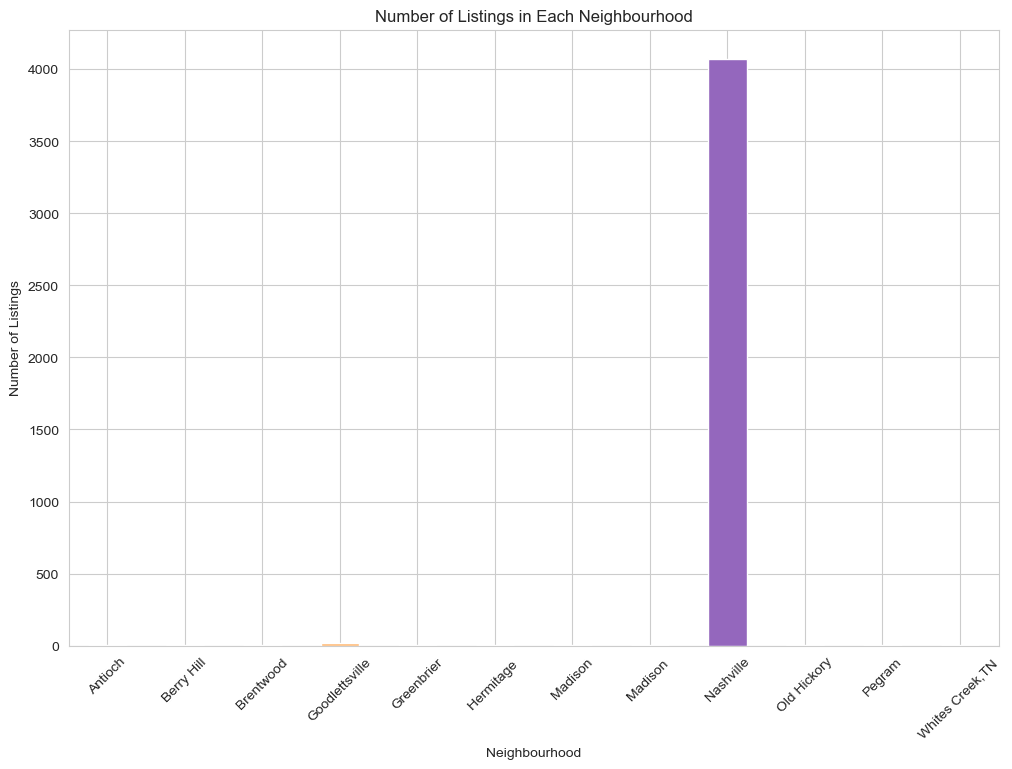

In [11]:
# Number of listings in each neighbourhood
# Count the number of listings in each neighbourhood
neighbourhood_counts = df_listings_rev.groupby('neighbourhood')['listing_id'].count()

# Create a bar graph with different colors
plt.figure(figsize=(12, 8))
neighbourhood_counts.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Number of Listings in Each Neighbourhood')
plt.xticks(rotation=45)
plt.show()

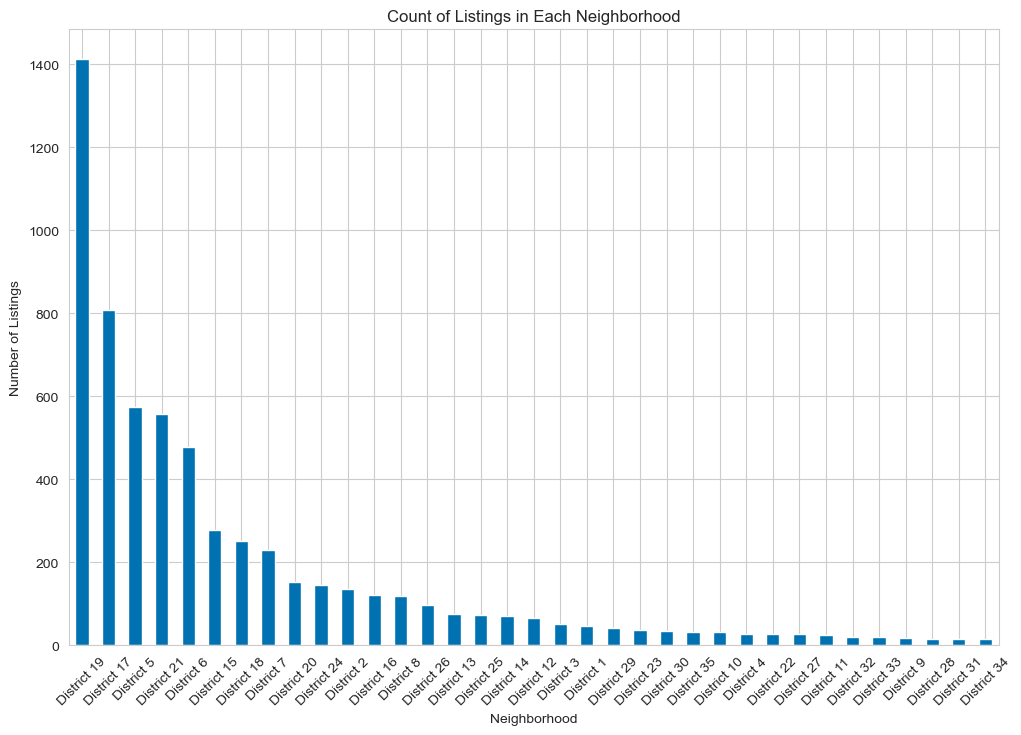

In [12]:
# Visulaizing the number of listings in each district

import pandas as pd
import matplotlib.pyplot as plt



# Group by 'neighborhood_cleansed' and count the number of listings in each neighborhood
neighborhood_counts = df_list.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Count of Listings in Each Neighborhood')
plt.xticks(rotation=45)
plt.show()


Number of room types : 4

Entire home/apt    4511
Private room        537
Hotel room           61
Shared room          13
Name: room_type, dtype: int64


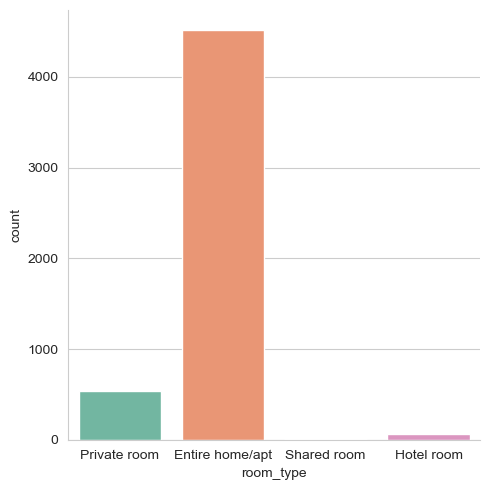

In [13]:
#Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.
# Number of room types
print("Number of room types :", len(df_listings_rev["room_type"].unique()))
print()

# Number of listings of each room type
print(df_listings_rev["room_type"].value_counts())
sns.catplot(x = "room_type", data = df_listings_rev, kind = "count", palette="Set2")

* Majority of room types for the listings are Entire home 

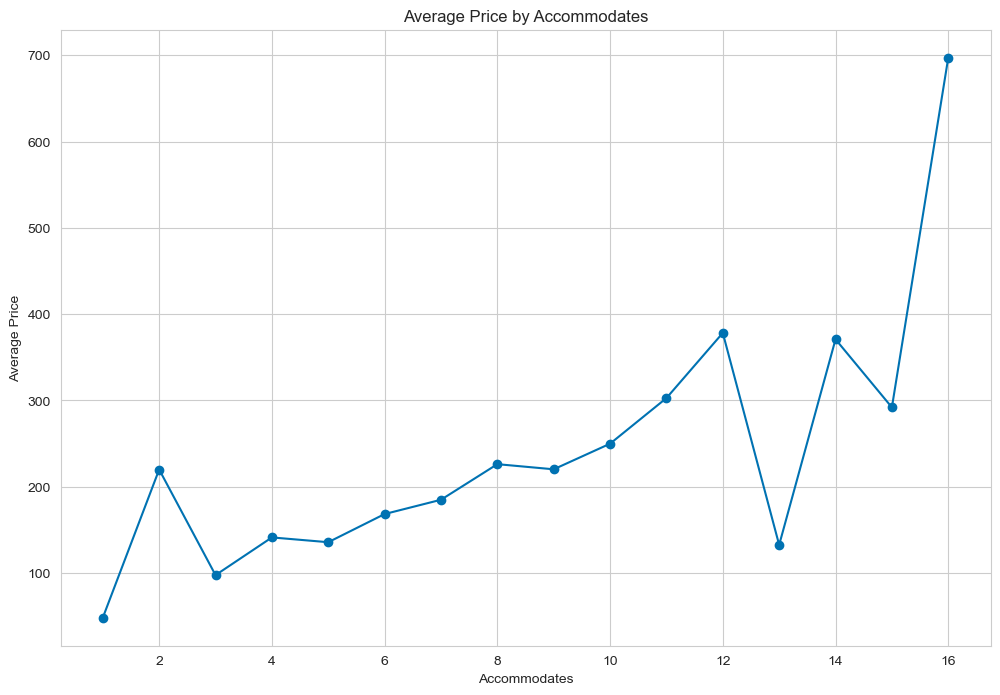

In [14]:
# Group the data by 'accommodates' and calculate the average price for each value
average_price_by_accommodates = df_listings_rev.groupby('accommodates')['price'].mean()

# Create a line chart
plt.figure(figsize=(12, 8))
plt.plot(average_price_by_accommodates, marker='o')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.title('Average Price by Accommodates')
plt.grid(True)
plt.show()

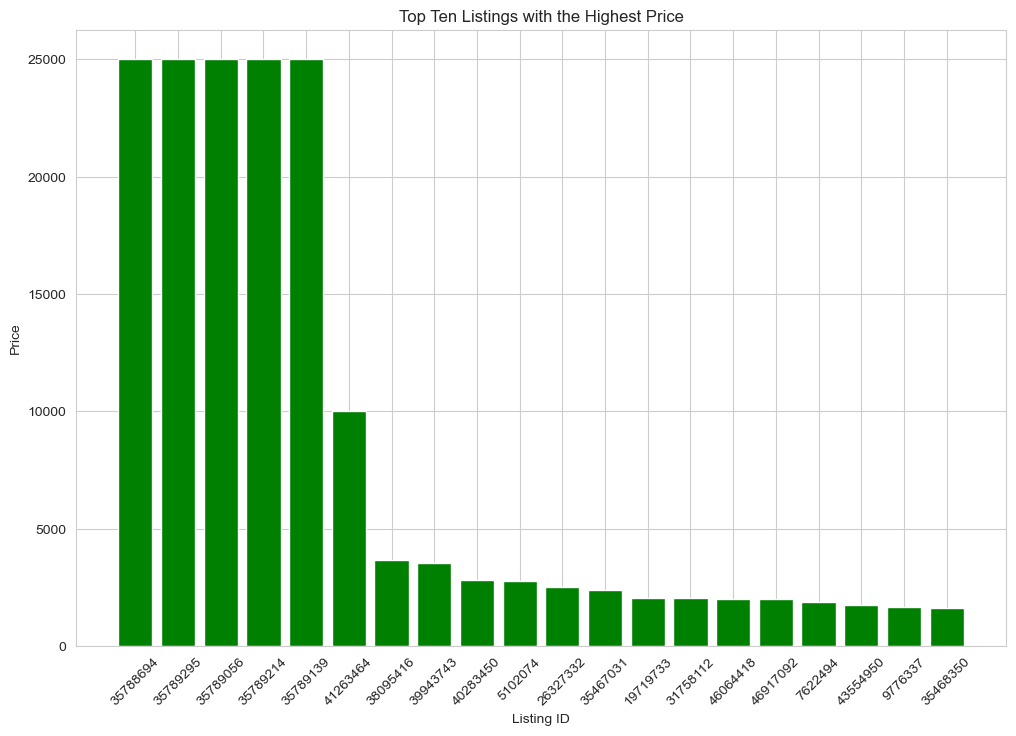

In [15]:
# Visulaizing the top 20 listings that has the highest price
# Convert 'price' column to numeric if it's not already
df_listings_rev['price'] = pd.to_numeric(df_listings_rev['price'], errors='coerce')

# Sort the DataFrame by 'price' in descending order and select the top 20
top_ten_listings = df_listings_rev.sort_values(by='price', ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_ten_listings['listing_id'].astype(str), top_ten_listings['price'],color='green')
plt.xlabel('Listing ID')
plt.ylabel('Price')
plt.title('Top Ten Listings with the Highest Price')
plt.xticks(rotation=45)
plt.show()

* From the bar chart we can see a huge difference in price which indicates the presence of outliers in terms of price.From the above chart , we can be sure that majority of the listings have the price less than 5000. Also, for better clarity , box plot will be a better option.

<Axes: xlabel='room_type', ylabel='price'>

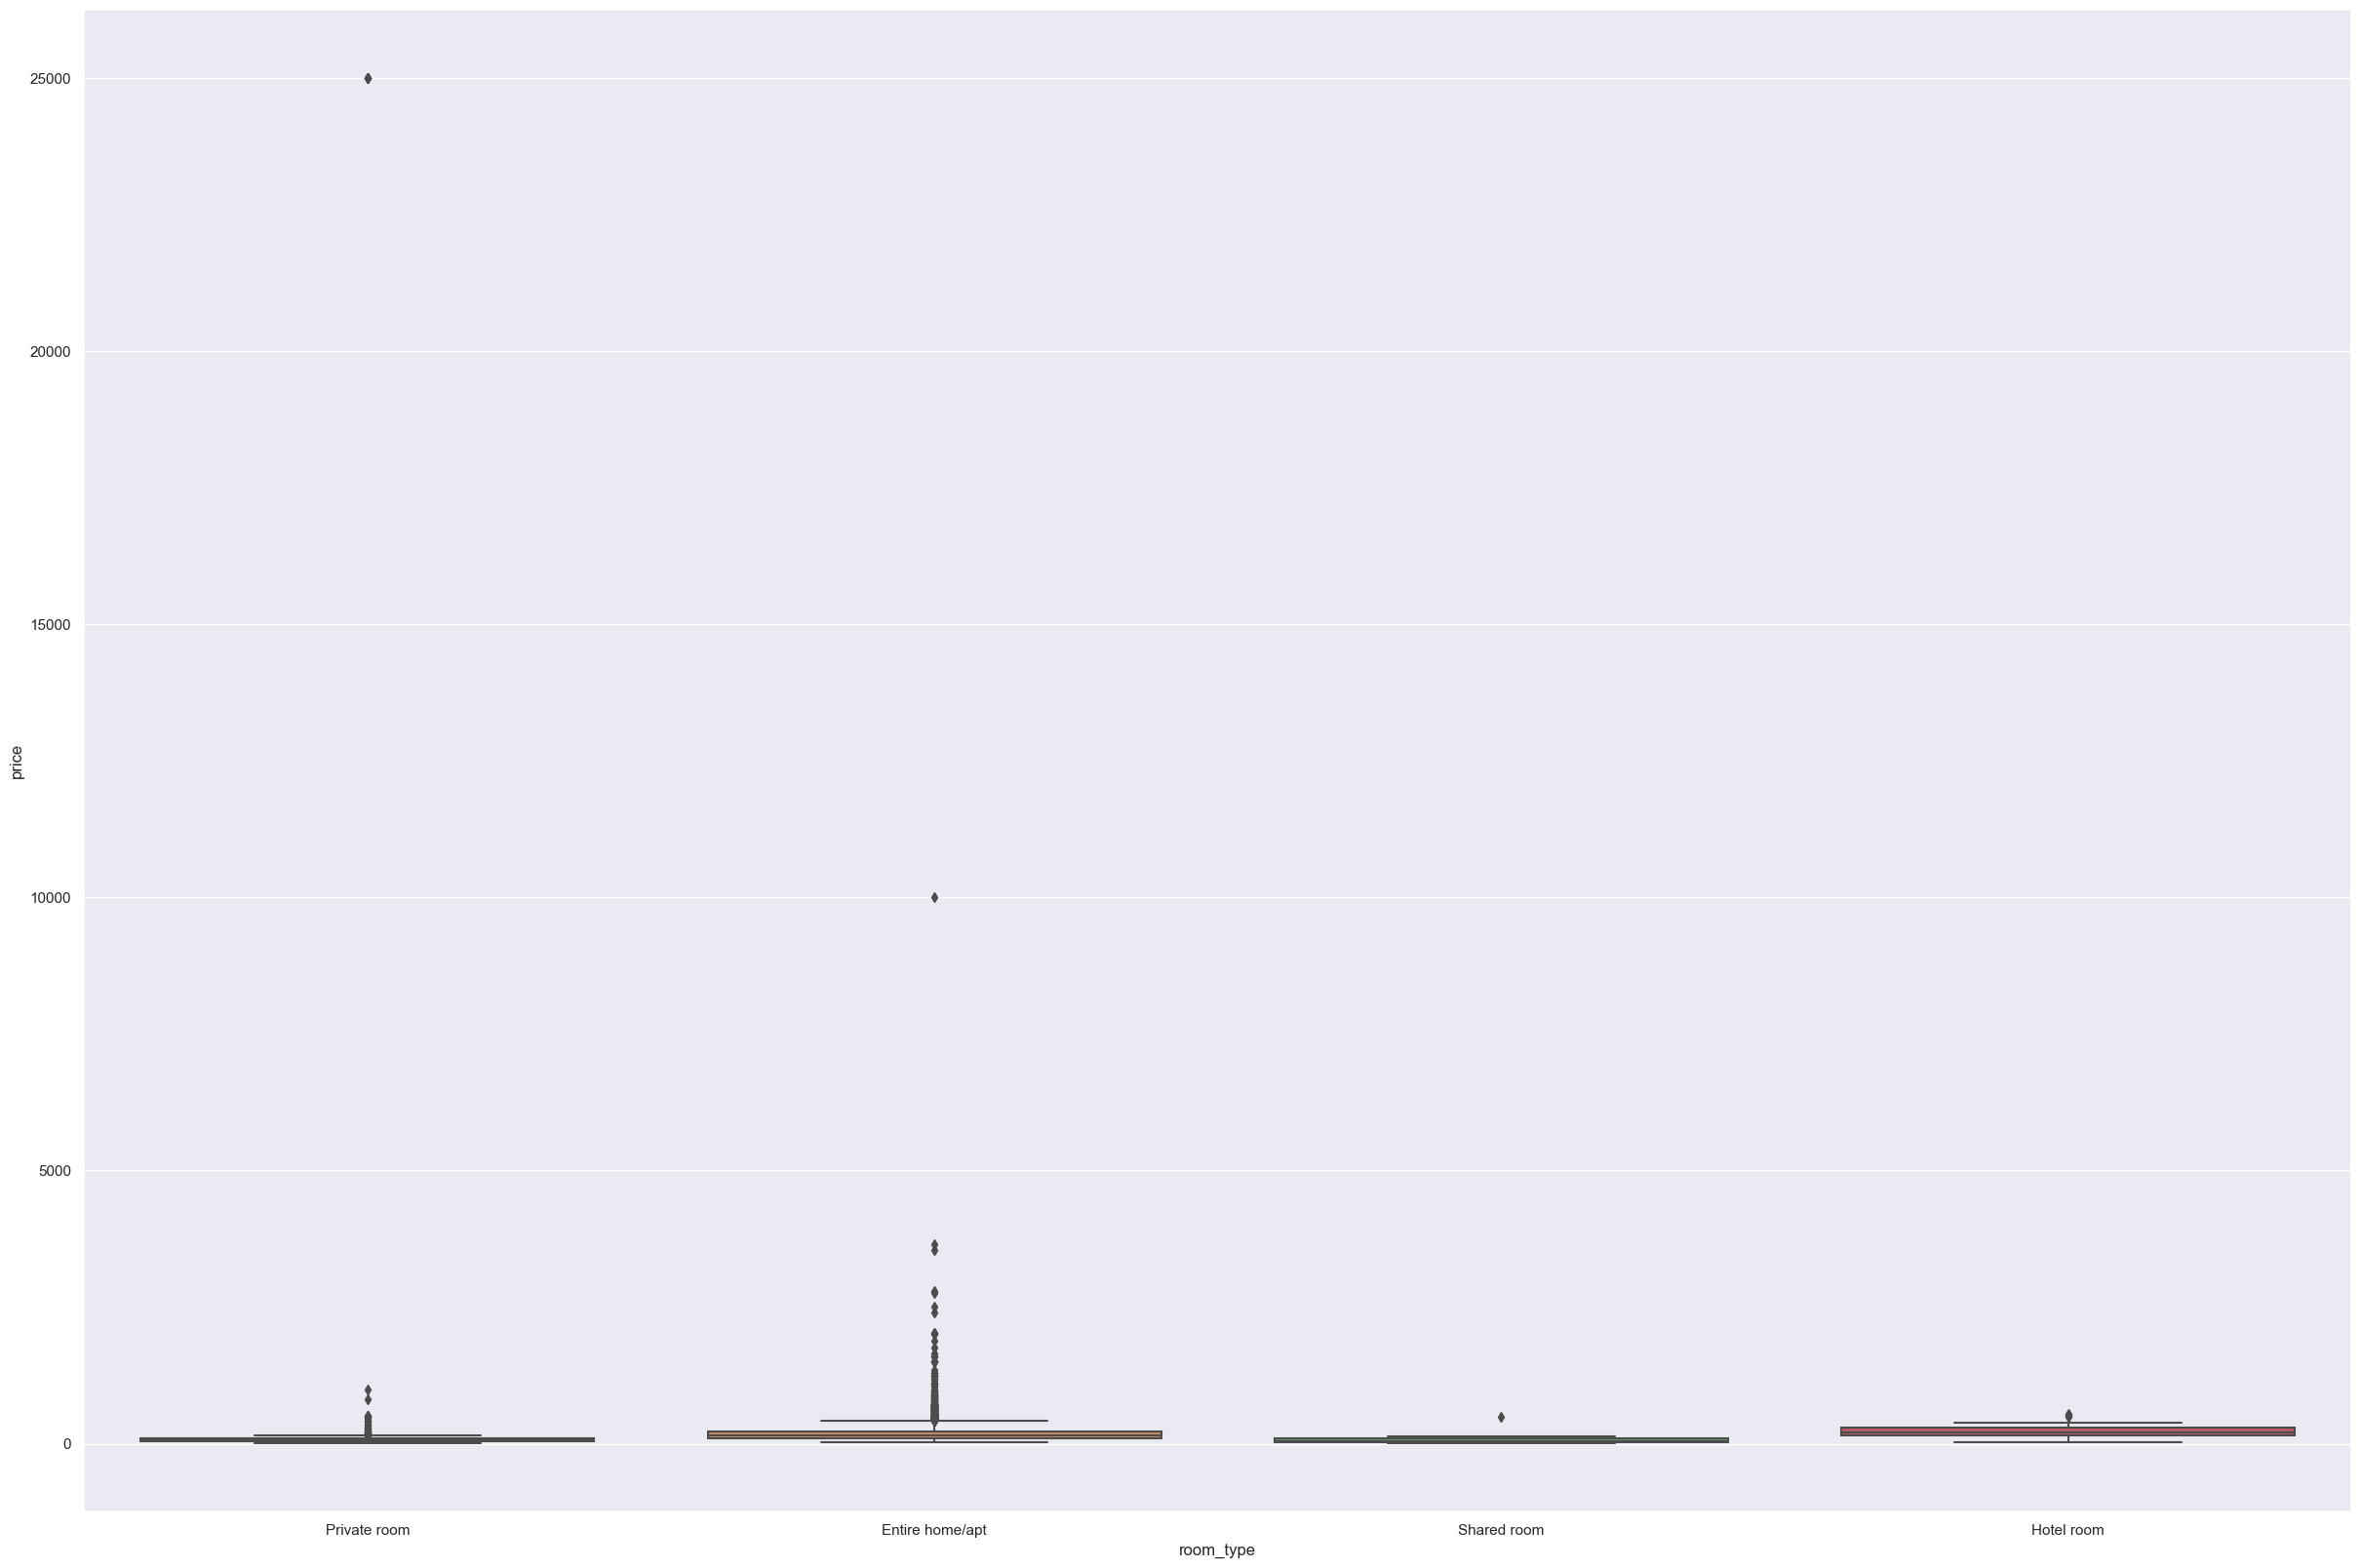

In [16]:
# boxplot showing variation in prices for different room_type
plt.figure(figsize=(30,20))
sns.set(style='darkgrid', palette='deep',)
sns.boxplot(x = 'room_type', y = 'price',  data=df_listings_rev)

In [17]:
# viewing the price values
with pd.option_context('display.max_rows', None):
    print(df_list['price'].value_counts())


$150.00       98
$100.00       98
$89.00        83
$99.00        82
$79.00        72
$90.00        69
$200.00       68
$75.00        66
$125.00       63
$55.00        56
$80.00        55
$95.00        54
$85.00        54
$50.00        53
$110.00       50
$60.00        48
$250.00       48
$120.00       47
$149.00       47
$175.00       47
$65.00        41
$109.00       41
$123.00       40
$70.00        40
$119.00       40
$142.00       39
$159.00       38
$71.00        37
$103.00       37
$88.00        37
$139.00       36
$153.00       36
$300.00       36
$178.00       36
$140.00       36
$69.00        36
$157.00       34
$84.00        33
$98.00        33
$93.00        33
$129.00       33
$156.00       32
$185.00       32
$59.00        32
$128.00       31
$86.00        31
$114.00       31
$116.00       31
$78.00        30
$82.00        29
$214.00       29
$96.00        29
$108.00       28
$136.00       28
$45.00        28
$145.00       28
$155.00       28
$115.00       28
$106.00       

* From the box plot and the value counts for 'price' , it is clear that we need to remove the extreme outliers from the dataset.

### Dataset selected for further analysis and Modelling

* df_listings_rev has been selected for the analysis since it has all the features which i felt is important for modelling.
* Eventhough df_cal_listings has the same features with approximately 2 million records, that is not considered here.Because df_cal_listings has the availability of each of the 6144 listings including all days from 2021-02-20 to 2022-02-20  but since my objective is to predict the price of new listings based on the amenities , district,features of the host etc, it won't depend on month, and reviews(which is not available for new listings at the time of prediction)

In [18]:
# viewing Percentage of listings with price greater than $800
percentage_above_800 = (sum(df_listings_rev['price'] > 800) / len(df_listings_rev)) * 100

print(f'Percentage of listings with price greater than $800: {percentage_above_800:.2f} %')


Percentage of listings with price greater than $800: 1.39 %


* In order to avoid the influence of a few overpriced data on the subsequent prediction results, selecting the data priced between 0 and 800

In [19]:
# removing outliers in price from df_listings_rev
final_df = df_listings_rev[df_listings_rev['price'] <= 800]
final_df.info(verbose =True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5121
Data columns (total 197 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    listing_id                                    5051 non-null   int64  
 1    name                                          5051 non-null   object 
 2    description                                   5031 non-null   object 
 3    host_id                                       5051 non-null   int64  
 4    host_name                                     5045 non-null   object 
 5    host_since                                    5051 non-null   float64
 6    host_response_rate                            4334 non-null   object 
 7    host_acceptance_rate                          4731 non-null   object 
 8    host_is_superhost                             5051 non-null   int64  
 9    host_neighbourhood                            2201

In [20]:
# removing features which are not important for price prediction
columns_to_remove =['listing_id','name','description','host_id','host_name','neighbourhood','host_since',
                            'host_response_rate','host_acceptance_rate','host_listings_count','latitude','longitude',
                            'property_type','room_type','has_availability','availability_30','availability_60',
                            'availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d',
                            'first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                            'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                            'reviews_per_month','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                            'calculated_host_listings_count_shared_rooms','hv_None','response_few_days',
                            'response_few_hours','response_within_day','response_within_hour','host_neighbourhood']
final_df = final_df.drop(columns_to_remove, axis=1)
final_df.info(verbose =True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5121
Data columns (total 155 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    host_is_superhost               5051 non-null   int64  
 1    host_total_listings_count       5051 non-null   float64
 2    host_has_profile_pic            5051 non-null   int64  
 3    host_identity_verified          5051 non-null   int64  
 4    accommodates                    5051 non-null   int64  
 5    bathrooms                       5051 non-null   float64
 6    bedrooms                        5051 non-null   float64
 7    beds                            5051 non-null   float64
 8    price                           5051 non-null   float64
 9    minimum_nights                  5051 non-null   int64  
 10   maximum_nights                  5051 non-null   int64  
 11   instant_bookable                5051 non-null   int64  
 12   am_Wifi           

### Reason for removing these features:
 * 'listing_id','host_id','host_since','latitude','longitude' - it doesn't have meaning in the model
 * 'name','description',,'host_name','neighbourhood','property_type','room_type'- Object datatype
 * 'host_response_rate','host_acceptance_rate'- For new listings, these variables won't be present
 * 'host_listings_count' - another feature 'host_total_listings_count' similar to 'host_listings_count' has been included
 * 'has_availability','availability_30','availability_60','availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month' ,'response_few_days', 'response_within_hour','response_few_hours','response_within_day'- For new listings,  these variables won't be present
 
               
                            
                           
                            

In [21]:
# value count for host_is_superhost
final_df['host_is_superhost'].value_counts()

1    3180
0    1865
2       6
Name: host_is_superhost, dtype: int64

In [22]:
# value count for host_identity_verified
final_df['host_identity_verified'].value_counts()

1    4169
0     876
2       6
Name: host_identity_verified, dtype: int64

In [23]:
#convert values of 2 in the superhost column into 1.
final_df["host_is_superhost"]=final_df["host_is_superhost"].apply(lambda x: 1 if x > 1 else x)
#convert the values of 2 in the host_identity_verified column into 1.
final_df["host_identity_verified"]=final_df["host_identity_verified"].apply(lambda x: 1 if x > 1 else x)



<div style="background-color:#a52a2a;  color:white; padding:20px">
<h2> 6. LASSO REGRESSION TO IDENTIFY IMPORTANT FEATURES FOR PRICE PREDICTION</h2>
</div>

In [24]:
# Create the X and y Dataset
# Create the X and y Dataset
X = final_df.drop(['price'], axis=1)
y = final_df['price']
X.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,instant_bookable,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,host_local
0,1,0.0,1,1,2,1.0,2.0,3.0,30,365,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1.0,1,1,2,1.0,1.0,1.0,2,30,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,4.0,1,1,2,1.0,1.0,1.0,30,1125,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,16.0,1,1,2,1.0,1.0,2.0,30,365,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,16.0,1,1,1,1.0,1.0,3.0,30,365,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Train-Test for regression
* Create a training dataset with 80% of the data (X-train and y-train)
* Create a testing dataset with 20% of the data (X-test and y-train

In [25]:
#importing libraries for test_train split
from sklearn.model_selection import train_test_split
#splitting dataset into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
# standardizing the dataset using standard scalar
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
#standardize the data

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#set the training data and test data to be the scaled data
X_train = X_train_sc
X_test = X_test_sc

In [27]:
# Importing libraries for lasso regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import cross_val_score

from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


### Settings for Lasso

In [28]:
#lasso = Lasso(alpha=0.5, fit_intercept=True, normalize = True)
lasso = Lasso(alpha=0.5, fit_intercept=True)

In [29]:
#Fit the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [30]:
#Predict with the fitted model
lasso_pred = lasso.predict(X_test)

In [31]:
#Assess with the fitted model
lasso.score(X_test, y_test)

0.5609857969999088

### Grid Search
* To find optimal parameters


In [32]:
# normalize the data using StandardScaler
X_temp = sc.fit_transform(X)
X_temp = pd.DataFrame(X_temp, columns=X_train.columns)

# Define technique to be used
reg_model = Lasso(fit_intercept=True, max_iter=3000)

# Define cross validation approach
crossval = RepeatedKFold(n_splits=5, n_repeats=4, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange( .1, 18, 0.5)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=crossval, n_jobs=-1)
search_results = search.fit(X_temp, y)

# Show "optimal" hyperparameter setting and performance measure
print('Best Lasso Regression Hyperparameter Setting from Grid Search')
print('Lasso Config: %s'   % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Lasso Regression Hyperparameter Setting from Grid Search
Lasso Config: {'alpha': 0.6}
Best Value for Scoring Method: 0.52758


### Fitting the Lasso Regression Model 

In [33]:
# Set the properties for the Lasso regression
lasso = Lasso(alpha=0.6, fit_intercept=True, max_iter=3000)


In [34]:
# Create the model by fitting X_train and y_train
lasso.fit(X_train, y_train)

Lasso(alpha=0.6, max_iter=3000)

In [35]:
#Predicting the expected y for the testing data
lasso_pred = lasso.predict(X_test)
lasso_pred

array([231.19869672, 268.67107292,  80.15315456, ..., 130.30506304,
       124.05700095, 340.21598761])

In [36]:
df_lasso_pred = pd.DataFrame(lasso_pred, columns = ['lasso_pred'])
df_lasso_pred.head()

,lasso_pred
0,231.198697
1,268.671073
2,80.153155
3,259.538769
4,58.732487


In [37]:
#Show the score (R Sq.) for the model
lasso.score(X_test, y_test)

0.5608528957135301

In [38]:
df_lasso = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.head()

,0,0
0,host_is_superhost,-1.833542
1,host_total_listings_count,-10.196633
2,host_has_profile_pic,0.290486
3,host_identity_verified,-2.915383
4,accommodates,29.846942


In [39]:
df_lasso.columns = ['Feature', 'lasso_coeff_0.6']
df_lasso = df_lasso.sort_values(by='lasso_coeff_0.6', ascending = False)

# df_lasso.columns = ['Feature', 'lasso_coeff_001']
# df_lasso = df_lasso.sort_values(by='lasso_coeff_001', ascending = False)
df_lasso

,Feature,lasso_coeff_0.6
5,bathrooms,31.739685
6,bedrooms,30.625494
4,accommodates,29.846942
128,dist_19,15.898095
126,dist_17,9.187835
...,...,...
35,am_Oven,-4.764694
116,room_Private room,-5.007564
36,am_Privateentrance,-6.701431
102,hv_identity_manual,-6.741765


In [40]:
df_lasso[df_lasso['lasso_coeff_0.6']!=0]

,Feature,lasso_coeff_0.6
5,bathrooms,31.739685
6,bedrooms,30.625494
4,accommodates,29.846942
128,dist_19,15.898095
126,dist_17,9.187835
...,...,...
35,am_Oven,-4.764694
116,room_Private room,-5.007564
36,am_Privateentrance,-6.701431
102,hv_identity_manual,-6.741765


### Re-Run Lasso to reduce the number of significant coefficients 


In [41]:
lasso = Lasso(alpha=1, fit_intercept=True, max_iter=3000)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)

print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')

df_lasso_1 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_1 = pd.concat([names, df_lasso_1], axis = 1)
df_lasso_1.columns = ['Feature', 'lasso_coeff_1']
df_lasso_1 = df_lasso_1.sort_values(by='lasso_coeff_1', ascending = False)
df_lasso_1

Lasso R Sq. Score ---------

0.5599985501016929

---------------------------


,Feature,lasso_coeff_1
5,bathrooms,31.360845
6,bedrooms,30.526191
4,accommodates,29.973650
128,dist_19,15.231707
55,am_Elevator,8.494553
...,...,...
8,minimum_nights,-4.404536
116,room_Private room,-4.804337
102,hv_identity_manual,-5.586788
36,am_Privateentrance,-6.425277


In [42]:
df_lasso_1[df_lasso_1['lasso_coeff_1']!=0]

,Feature,lasso_coeff_1
5,bathrooms,31.360845
6,bedrooms,30.526191
4,accommodates,29.973650
128,dist_19,15.231707
55,am_Elevator,8.494553
...,...,...
8,minimum_nights,-4.404536
116,room_Private room,-4.804337
102,hv_identity_manual,-5.586788
36,am_Privateentrance,-6.425277


In [43]:
#merging df_lasso and df_lasso_1
df_lasso = pd.merge(df_lasso, df_lasso_1, how='inner', on='Feature')
df_lasso

,Feature,lasso_coeff_0.6,lasso_coeff_1
0,bathrooms,31.739685,31.360845
1,bedrooms,30.625494,30.526191
2,accommodates,29.846942,29.973650
3,dist_19,15.898095,15.231707
4,dist_17,9.187835,8.473372
...,...,...,...
149,am_Oven,-4.764694,-3.743462
150,room_Private room,-5.007564,-4.804337
151,am_Privateentrance,-6.701431,-6.425277
152,hv_identity_manual,-6.741765,-5.586788


In [44]:
# setting alpha score = 3
lasso = Lasso(alpha=3, fit_intercept=True, max_iter=3000)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)

print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')

df_lasso_3 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_3 = pd.concat([names, df_lasso_3], axis = 1)
df_lasso_3.columns = ['Feature', 'lasso_coeff_3']
df_lasso_3 = df_lasso_3.sort_values(by='lasso_coeff_3', ascending = False)
df_lasso_3

Lasso R Sq. Score ---------

0.5446364596608994

---------------------------


,Feature,lasso_coeff_3
6,bedrooms,30.255894
5,bathrooms,29.860260
4,accommodates,28.767892
128,dist_19,11.013760
115,room_Hotel room,7.451240
...,...,...
116,room_Private room,-3.910179
30,am_Refrigerator,-3.912501
102,hv_identity_manual,-4.158752
36,am_Privateentrance,-5.935063


In [45]:
df_lasso_3[df_lasso_3['lasso_coeff_3']!=0]

,Feature,lasso_coeff_3
6,bedrooms,30.255894
5,bathrooms,29.860260
4,accommodates,28.767892
128,dist_19,11.013760
115,room_Hotel room,7.451240
56,am_Indoorfireplace,6.983846
55,am_Elevator,6.075973
127,dist_18,5.058539
126,dist_17,4.483046
69,am_Hottub,3.324694


In [46]:
df_lasso_3[df_lasso_3['lasso_coeff_3']!=0].shape

(47, 2)

In [47]:
#merging df_lasso and df_lasso_1
df_lasso = pd.merge(df_lasso, df_lasso_3, how='inner', on='Feature')
df_lasso

,Feature,lasso_coeff_0.6,lasso_coeff_1,lasso_coeff_3
0,bathrooms,31.739685,31.360845,29.860260
1,bedrooms,30.625494,30.526191,30.255894
2,accommodates,29.846942,29.973650,28.767892
3,dist_19,15.898095,15.231707,11.013760
4,dist_17,9.187835,8.473372,4.483046
...,...,...,...,...
149,am_Oven,-4.764694,-3.743462,-0.732664
150,room_Private room,-5.007564,-4.804337,-3.910179
151,am_Privateentrance,-6.701431,-6.425277,-5.935063
152,hv_identity_manual,-6.741765,-5.586788,-4.158752


In [48]:
df_coef = df_lasso.set_index('Feature')
df_coef

,lasso_coeff_0.6,lasso_coeff_1,lasso_coeff_3
Feature,,,
bathrooms,31.739685,31.360845,29.860260
bedrooms,30.625494,30.526191,30.255894
accommodates,29.846942,29.973650,28.767892
dist_19,15.898095,15.231707,11.013760
dist_17,9.187835,8.473372,4.483046
...,...,...,...
am_Oven,-4.764694,-3.743462,-0.732664
room_Private room,-5.007564,-4.804337,-3.910179
am_Privateentrance,-6.701431,-6.425277,-5.935063


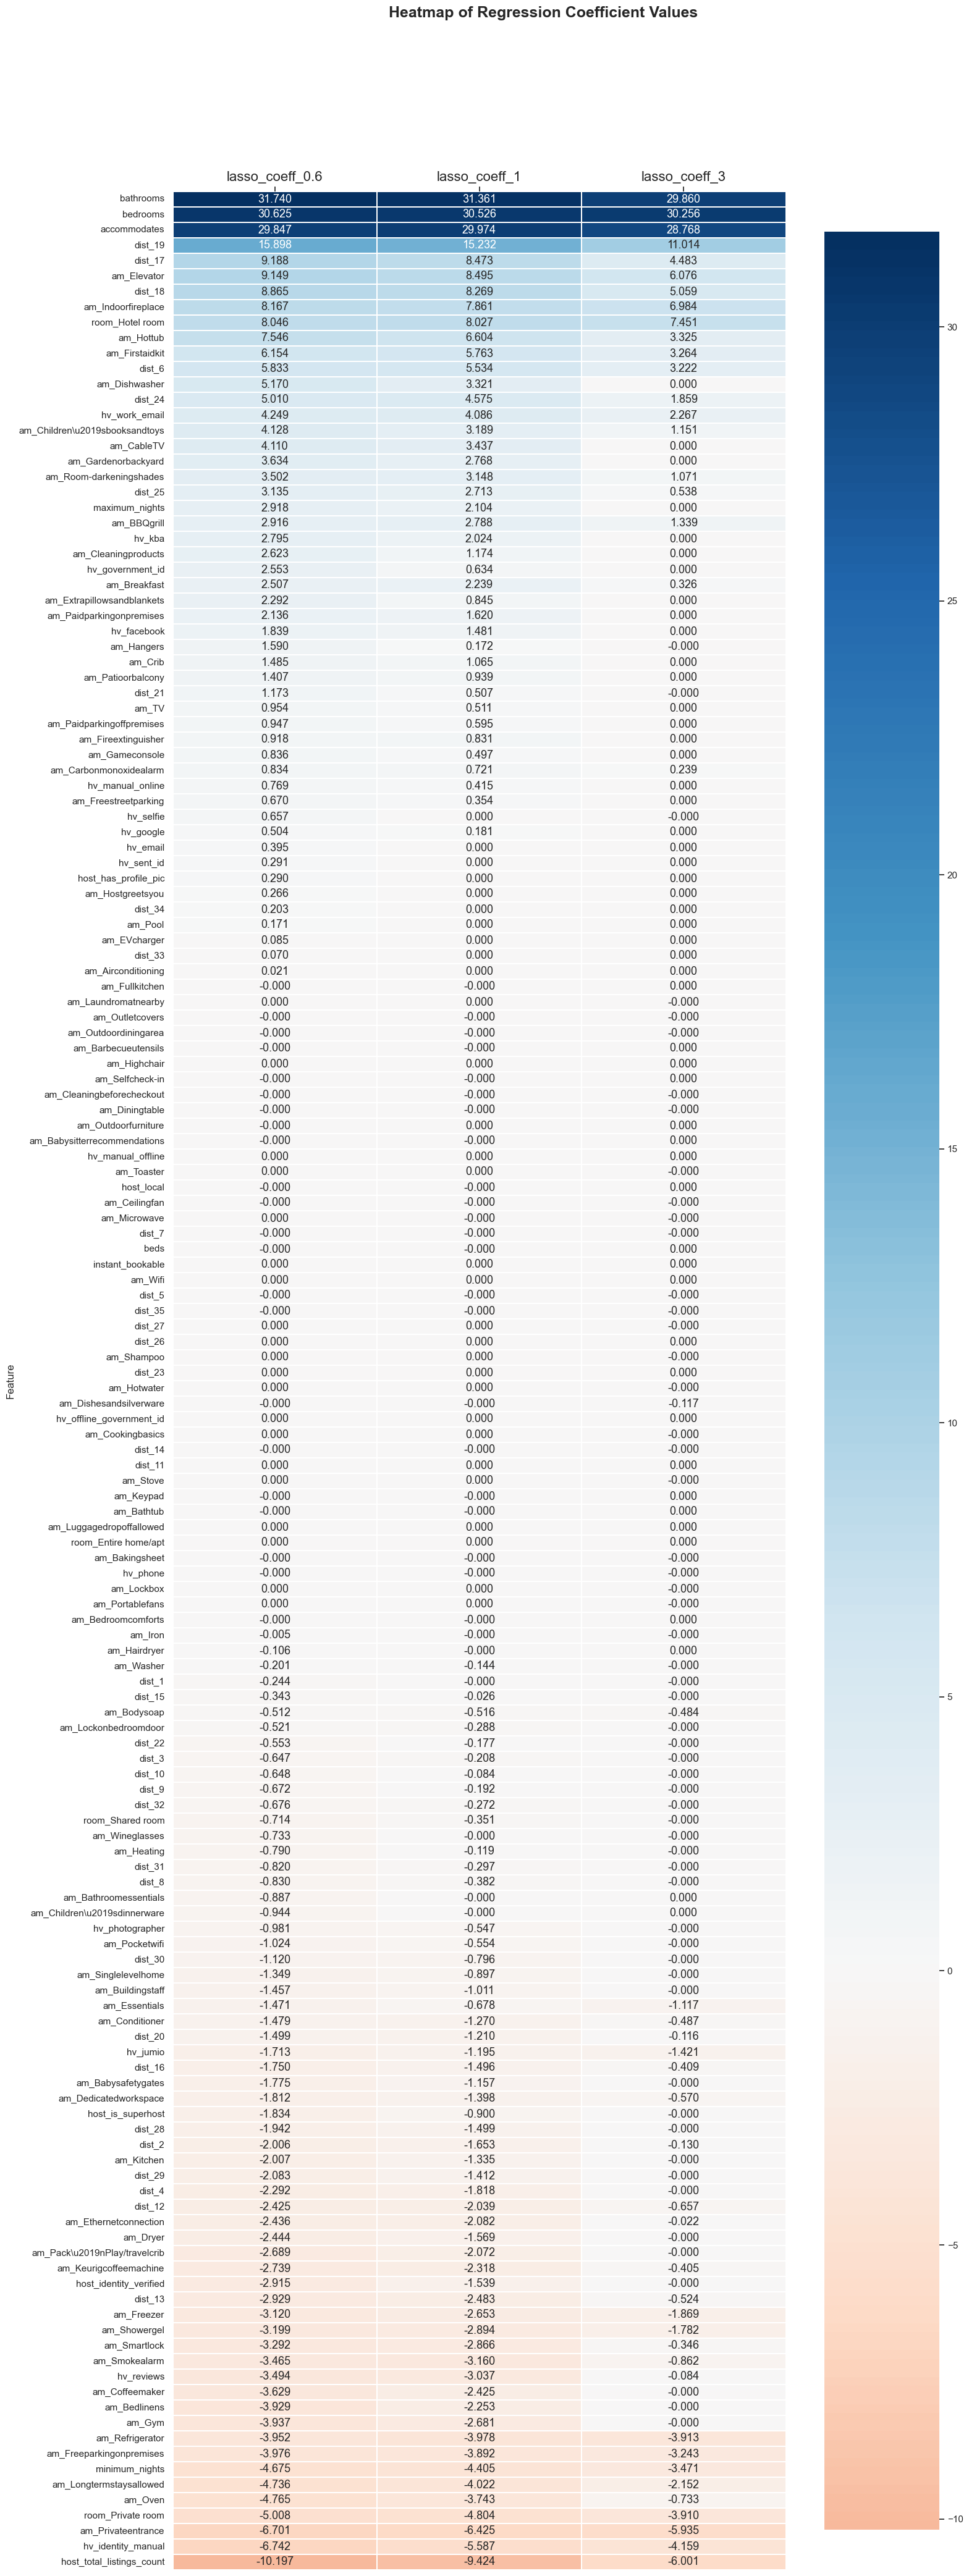

In [49]:

# Show coefficient values in a heatmap
index = df_coef.index
plt.figure(figsize=(16,50))
ax = sns.heatmap(df_coef, linewidths=0.1, center = 0, cmap='RdBu', linecolor='white', 
            annot=True, fmt=".3f", annot_kws={"size": 13})
ax.xaxis.tick_top()    # Put x labels at top of plot
ax.set_xticklabels(df_coef.columns.values, fontsize = 16)
#ax.set_yticklabels(index, fontsize = 14)
plt.suptitle('Heatmap of Regression Coefficient Values', fontweight='bold', 
          fontsize='18', ha='center', y=.94)
plt.show()

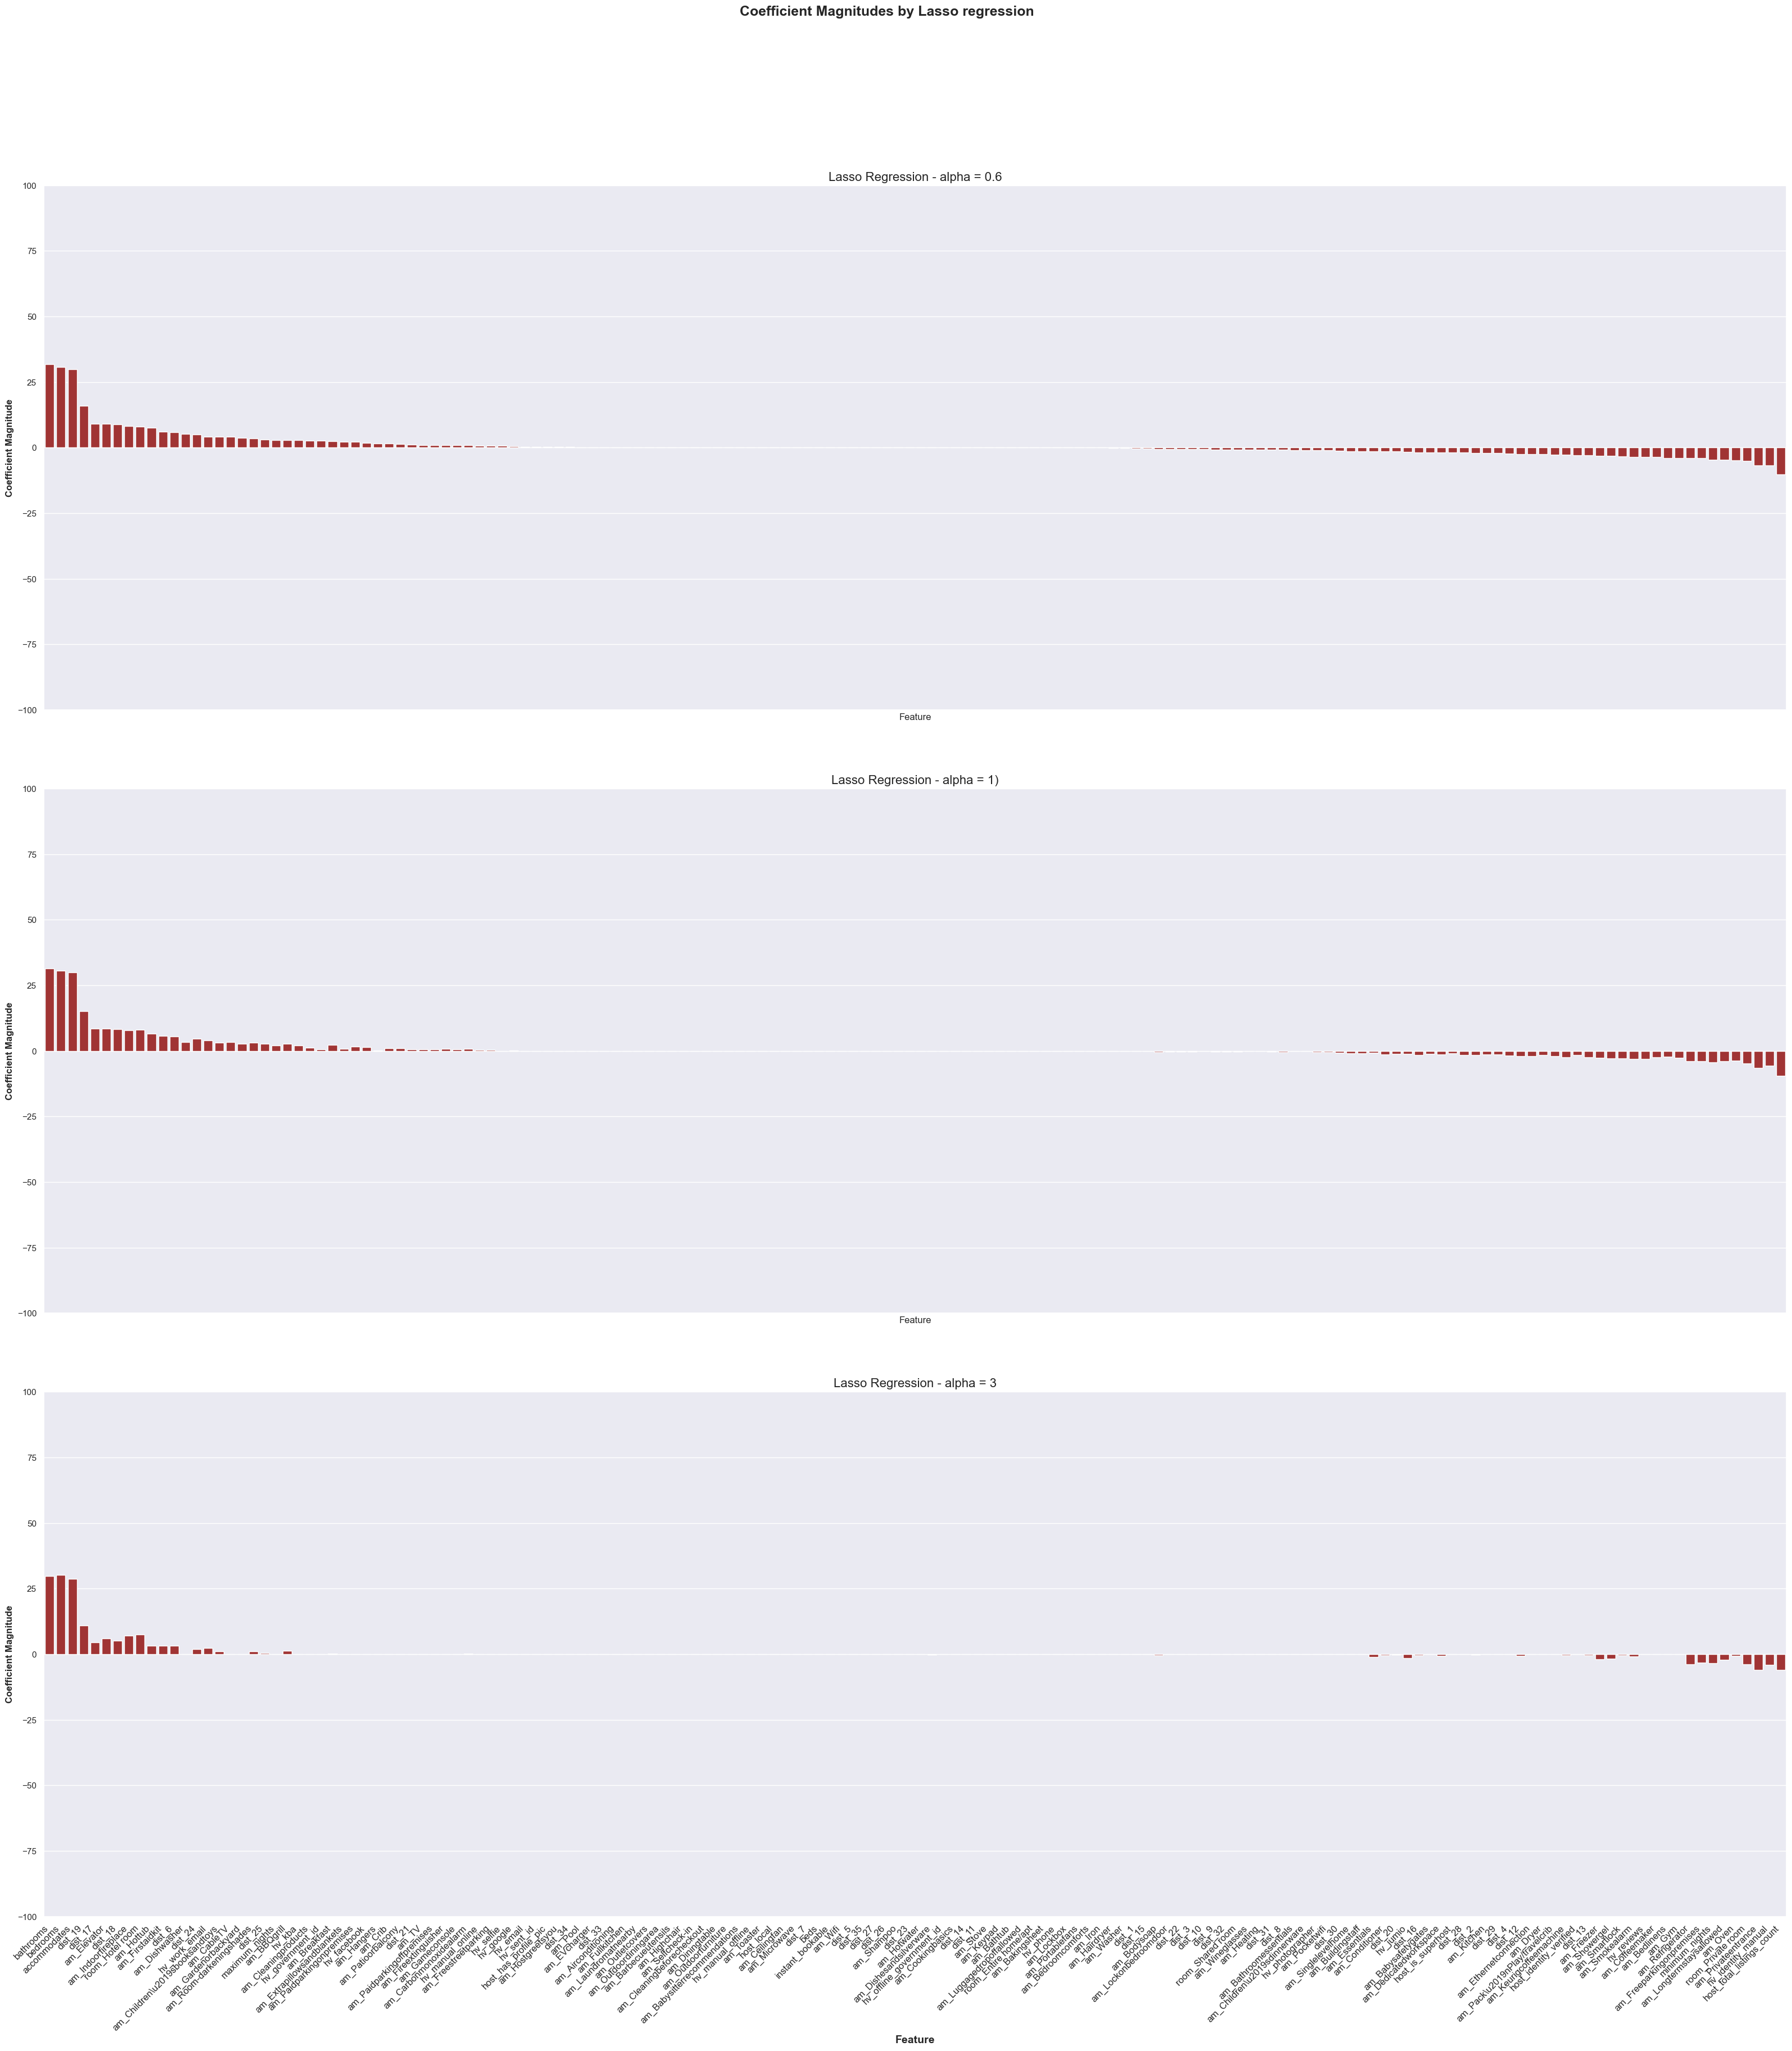

In [50]:


plt.figure(figsize=(40,40))
plt.subplots_adjust(hspace=0.15)

# Set overall title for plot
plt.suptitle('Coefficient Magnitudes by Lasso regression', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .96)

# Create a bar plot of regression coefficients for linear regression
plt.subplot(311)
chart1 = sns.barplot(x = index, y = "lasso_coeff_0.6", data = df_coef, color = 'firebrick')
chart1.set_title("Lasso Regression - alpha = 0.6", fontdict = {'fontsize' : 16})
chart1.set_ylim([-100, 100])
chart1.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart1.tick_params(labelbottom=False)   # Remove bottom tick labels

# Create a bar plot of regression coefficients for ridge regression
plt.subplot(312)
chart2 = sns.barplot(x = index, y = "lasso_coeff_1", data = df_coef, color = 'firebrick')
chart2.set_title("Lasso Regression - alpha = 1)", fontdict = {'fontsize' : 16})
chart2.set_ylim([-100, 100])
chart2.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart2.tick_params(labelbottom=False)   # Remove bottom tick labels

# Create a bar plot of regression coefficients for lasso regression
plt.subplot(313)
chart3 = sns.barplot(x = index, y = "lasso_coeff_3", data = df_coef, color = 'firebrick')
chart3.set_title("Lasso Regression - alpha = 3", fontdict = {'fontsize' : 16})
chart3.set_ylim([-100, 100])
chart3.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart3.set_xticklabels(index, rotation=45, ha='right', fontsize='12')
chart3.set_xlabel('Feature', fontweight='bold', fontsize='14', ha='center')

plt.show()

<div style="background-color:#a52a2a;  color:white; padding:20px">
<h2> SUMMARY OF LASSO REGRESSION </h2>
</div>


* number of features initially  - 154
* for aplha = 0.6, accuracy score = 0.56, number of features with non zero lasso coeff = 113
* for aplha = 1, accuracy score = 0.559, number of features with non zero lasso coeff = 96
* for aplha = 3, accuracy score = 0.54, number of features with non zero lasso coeff = 47
* The most important feature in all the cases are number of bedrooms and bathrooms.
Hence choosing an alpha = 3 will result a reduction in number of feature variables from 113 to 50 while the accuracy score is only reduced to 0.45 from 0.46


<div style="background-color:#4a86e8;  color:white; padding:20px">
<h2> 7. RIDGE REGRESSION TO PREDICT PRICE FOR NEW LISTINGS</h2>
</div>

In [51]:
# we are considering the prominent features that we obtained by lasso regression to predict the target variable using ridge regression
df_new_ridge = df_lasso_3[df_lasso_3['lasso_coeff_3']!=0]
df_new_ridge

,Feature,lasso_coeff_3
6,bedrooms,30.255894
5,bathrooms,29.860260
4,accommodates,28.767892
128,dist_19,11.013760
115,room_Hotel room,7.451240
56,am_Indoorfireplace,6.983846
55,am_Elevator,6.075973
127,dist_18,5.058539
126,dist_17,4.483046
69,am_Hottub,3.324694


In [52]:
# Assuming 'df' is your DataFrame
for value in df_new_ridge['Feature']:
    print(value)


bedrooms
bathrooms
accommodates
dist_19
room_Hotel room
am_Indoorfireplace
am_Elevator
dist_18
dist_17
am_Hottub
am_Firstaidkit
dist_6
hv_work_email
dist_24
am_BBQgrill
am_Children\u2019sbooksandtoys
am_Room-darkeningshades
dist_25
am_Breakfast
am_Carbonmonoxidealarm
am_Ethernetconnection
hv_reviews
dist_20
am_Dishesandsilverware
dist_2
am_Smartlock
am_Keurigcoffeemachine
dist_16
am_Bodysoap
am_Conditioner
dist_13
am_Dedicatedworkspace
dist_12
am_Oven
am_Smokealarm
am_Essentials
hv_jumio
am_Showergel
am_Freezer
am_Longtermstaysallowed
am_Freeparkingonpremises
minimum_nights
room_Private room
am_Refrigerator
hv_identity_manual
am_Privateentrance
host_total_listings_count


In [53]:
#creating X and y dataset for ridge regression
X = final_df[["bedrooms", "bathrooms", "accommodates", "dist_19", "room_Hotel room", "am_Indoorfireplace", "am_Elevator", "dist_18", "dist_17", "am_Hottub", "am_Firstaidkit", "dist_6", "hv_work_email", "dist_24", "am_BBQgrill", "am_Room-darkeningshades", "dist_25", "am_Breakfast", "am_Carbonmonoxidealarm", "am_Ethernetconnection", "hv_reviews", "dist_20", "am_Dishesandsilverware", "dist_2", "am_Smartlock", "am_Keurigcoffeemachine", "dist_16", "am_Bodysoap", "am_Conditioner", "dist_13", "am_Dedicatedworkspace", "dist_12", "am_Oven", "am_Smokealarm", "am_Essentials", "hv_jumio", "am_Showergel", "am_Freezer", "am_Longtermstaysallowed", "am_Freeparkingonpremises", "minimum_nights", "room_Private room", "am_Refrigerator", "hv_identity_manual", "am_Privateentrance", "host_total_listings_count"
]]                      
y = final_df['price']                             

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5121
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   5051 non-null   float64
 1   bathrooms                  5051 non-null   float64
 2   accommodates               5051 non-null   int64  
 3   dist_19                    5051 non-null   int64  
 4   room_Hotel room            5051 non-null   int64  
 5   am_Indoorfireplace         5051 non-null   int64  
 6   am_Elevator                5051 non-null   int64  
 7   dist_18                    5051 non-null   int64  
 8   dist_17                    5051 non-null   int64  
 9   am_Hottub                  5051 non-null   int64  
 10  am_Firstaidkit             5051 non-null   int64  
 11  dist_6                     5051 non-null   int64  
 12  hv_work_email              5051 non-null   int64  
 13  dist_24                    5051 non-null   int64

In [55]:
#creating training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
#standardising the dataset using standard scalar
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)



In [57]:
#set the training data and test data to be the scaled data
X_train = X_train_sc
X_test = X_test_sc

### Grid Search

In [58]:
# normalize the data using StandardScaler
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc, columns=X_train.columns)

# Define technique to be used
reg_model = Ridge(fit_intercept=True,  max_iter=3000)

# Define cross validation approach
crossval = RepeatedKFold(n_splits=10, n_repeats=4, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(0.1, 5, .25)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=crossval, n_jobs=-1)
search_results = search.fit(X_sc, y)

# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s'   % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 4.85}
Best Value for Scoring Method: 0.52718


In [59]:
# Set the properties for the Ridge regression
ridge = Ridge(alpha=4.85, fit_intercept=True,  max_iter=3000)

In [60]:
#Create the model by fitting X_train and y_train
ridge.fit(X_train, y_train)

Ridge(alpha=4.85, max_iter=3000)

In [61]:
#Predicting the expected y for the testing data (y_test)
ridge_pred = ridge.predict(X_test)
ridge_pred
# Predictions into daatframe
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
display(df_ridge_pred.head())
df_ridge_pred.shape

,ridge_pred
0,226.345211
1,267.659383
2,69.867636
3,246.637359
4,67.460235


(1011, 1)

In [62]:
#setting the index to concatenate
df_target = pd.DataFrame(y_test).reset_index()
display(df_target.head())
df_target.shape

,index,price
0,4779,158.0
1,698,325.0
2,65,77.0
3,3481,207.0
4,4751,61.0


(1011, 2)

In [63]:
#Concatenate actual and predicted
df_results = pd.concat([df_target, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['price'] - df_results['ridge_pred']
df_results

,index,price,ridge_pred,ridge_resid
0,4779,158.0,226.345211,-68.345211
1,698,325.0,267.659383,57.340617
2,65,77.0,69.867636,7.132364
3,3481,207.0,246.637359,-39.637359
4,4751,61.0,67.460235,-6.460235
...,...,...,...,...
1006,3991,199.0,114.119500,84.880500
1007,1366,113.0,129.721936,-16.721936
1008,1987,110.0,125.623336,-15.623336
1009,3854,120.0,120.483518,-0.483518


In [64]:
#Assess with the fitted model
#Show the score (R Sq.) for the model
ridge_false = Ridge(alpha=4.85, fit_intercept=True, max_iter=3000)
ridge_false.fit(X_train, y_train)
ridge_false.score(X_test, y_test)

ridge.score(X_test, y_test)

0.5545437155669305

In [65]:
# converting the ridge coefficients to a dataframe
df_ridge = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge = pd.concat([names, df_ridge], axis = 1)
df_ridge.head()

,0,0
0,bedrooms,33.134413
1,bathrooms,30.989863
2,accommodates,30.791859
3,dist_19,16.194484
4,room_Hotel room,8.799126


In [66]:
#sorting the ridge coefficients 
df_ridge.columns = ['Feature', 'ridge_coeff_4.85']
df_ridge = df_ridge.sort_values(by='ridge_coeff_4.85', ascending = False)
df_ridge

,Feature,ridge_coeff_4.85
0,bedrooms,33.134413
1,bathrooms,30.989863
2,accommodates,30.791859
3,dist_19,16.194484
8,dist_17,10.122049
7,dist_18,10.087358
4,room_Hotel room,8.799126
5,am_Indoorfireplace,8.722713
6,am_Elevator,8.209755
9,am_Hottub,7.503869


In [67]:
df_reg = pd.merge(df_ridge, df_lasso_3, how='inner', on='Feature')
df_reg

,Feature,ridge_coeff_4.85,lasso_coeff_3
0,bedrooms,33.134413,30.255894
1,bathrooms,30.989863,29.860260
2,accommodates,30.791859,28.767892
3,dist_19,16.194484,11.013760
4,dist_17,10.122049,4.483046
5,dist_18,10.087358,5.058539
6,room_Hotel room,8.799126,7.451240
7,am_Indoorfireplace,8.722713,6.983846
8,am_Elevator,8.209755,6.075973
9,am_Hottub,7.503869,3.324694


In [68]:
df_coef = df_reg.set_index('Feature')
df_coef

,ridge_coeff_4.85,lasso_coeff_3
Feature,,
bedrooms,33.134413,30.255894
bathrooms,30.989863,29.860260
accommodates,30.791859,28.767892
dist_19,16.194484,11.013760
dist_17,10.122049,4.483046
dist_18,10.087358,5.058539
room_Hotel room,8.799126,7.451240
am_Indoorfireplace,8.722713,6.983846
am_Elevator,8.209755,6.075973


In [69]:
#viewing ridge , lasso  predictions, residual and price in a dataframe
df_lasso_pred = pd.DataFrame(lasso_pred, columns = ['lasso_pred'])


df_results = pd.concat([df_results, df_lasso_pred], axis=1)
df_results['lasso_resid'] = df_results['price'] - df_results['lasso_pred']
df_results.head()

,index,price,ridge_pred,ridge_resid,lasso_pred,lasso_resid
0,4779.0,158.0,226.345211,-68.345211,113.907490,44.092510
1,698.0,325.0,267.659383,57.340617,104.017595,220.982405
2,65.0,77.0,69.867636,7.132364,279.981283,-202.981283
3,3481.0,207.0,246.637359,-39.637359,115.441276,91.558724
4,4751.0,61.0,67.460235,-6.460235,125.094494,-64.094494


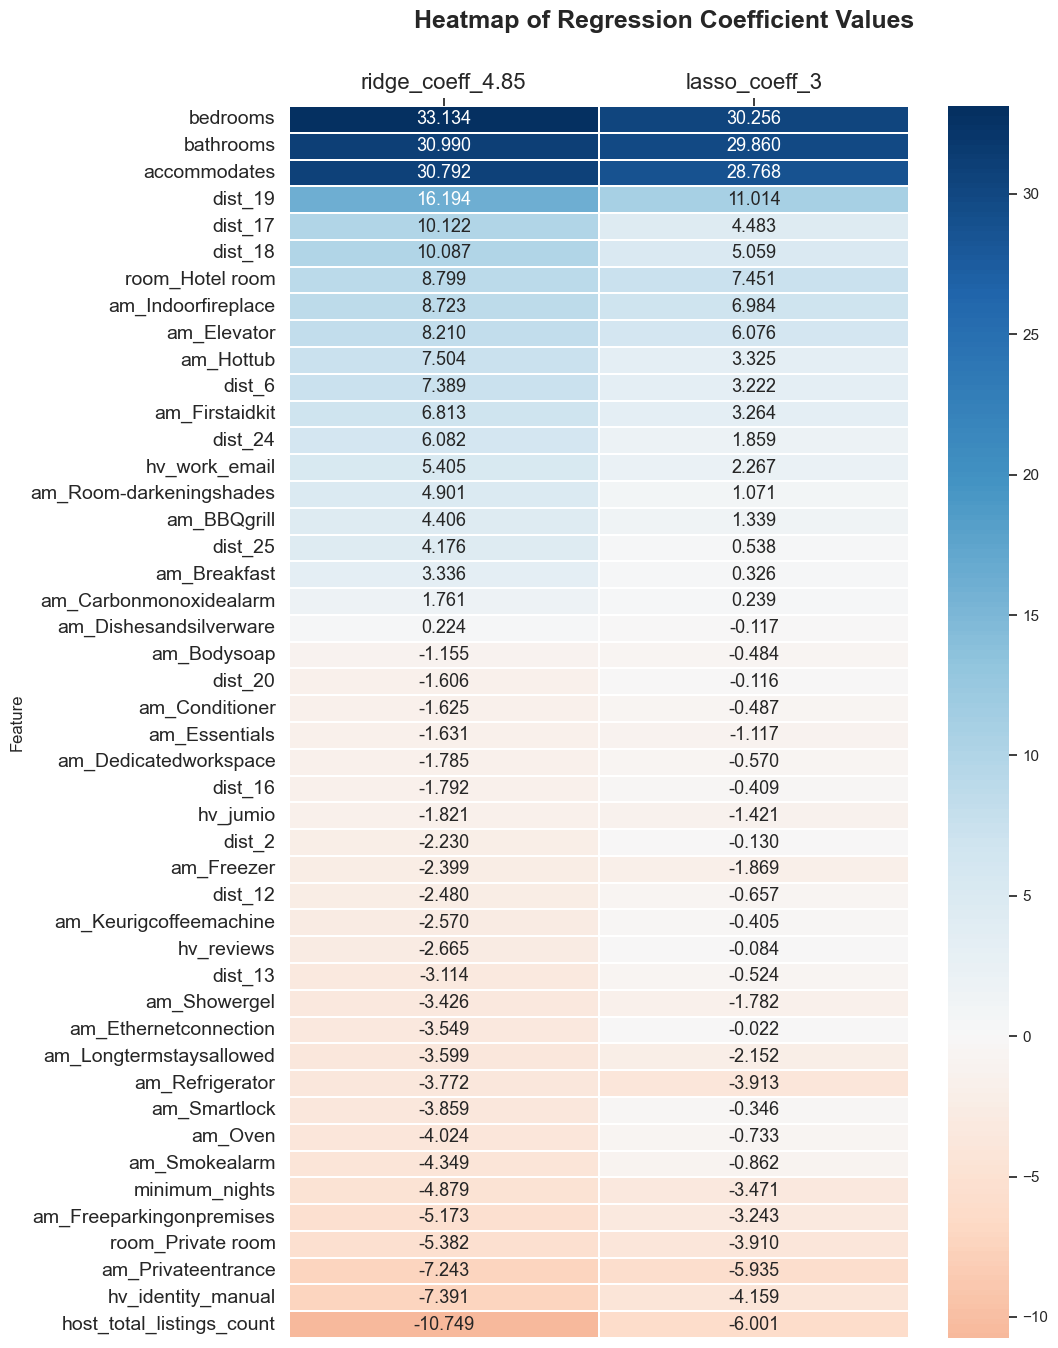

In [70]:
# Show coefficient values in a heatmap
index = df_coef.index
plt.figure(figsize=(10,16))
ax = sns.heatmap(df_coef, linewidths=0.1, center = 0, cmap='RdBu', linecolor='white', 
            annot=True, fmt=".3f", annot_kws={"size": 13})
ax.xaxis.tick_top()    # Put x labels at top of plot
ax.set_xticklabels(df_coef.columns.values, fontsize = 16)
ax.set_yticklabels(index, fontsize = 14)
plt.suptitle('Heatmap of Regression Coefficient Values', fontweight='bold', 
          fontsize='18', ha='center', y=.94)
plt.show()

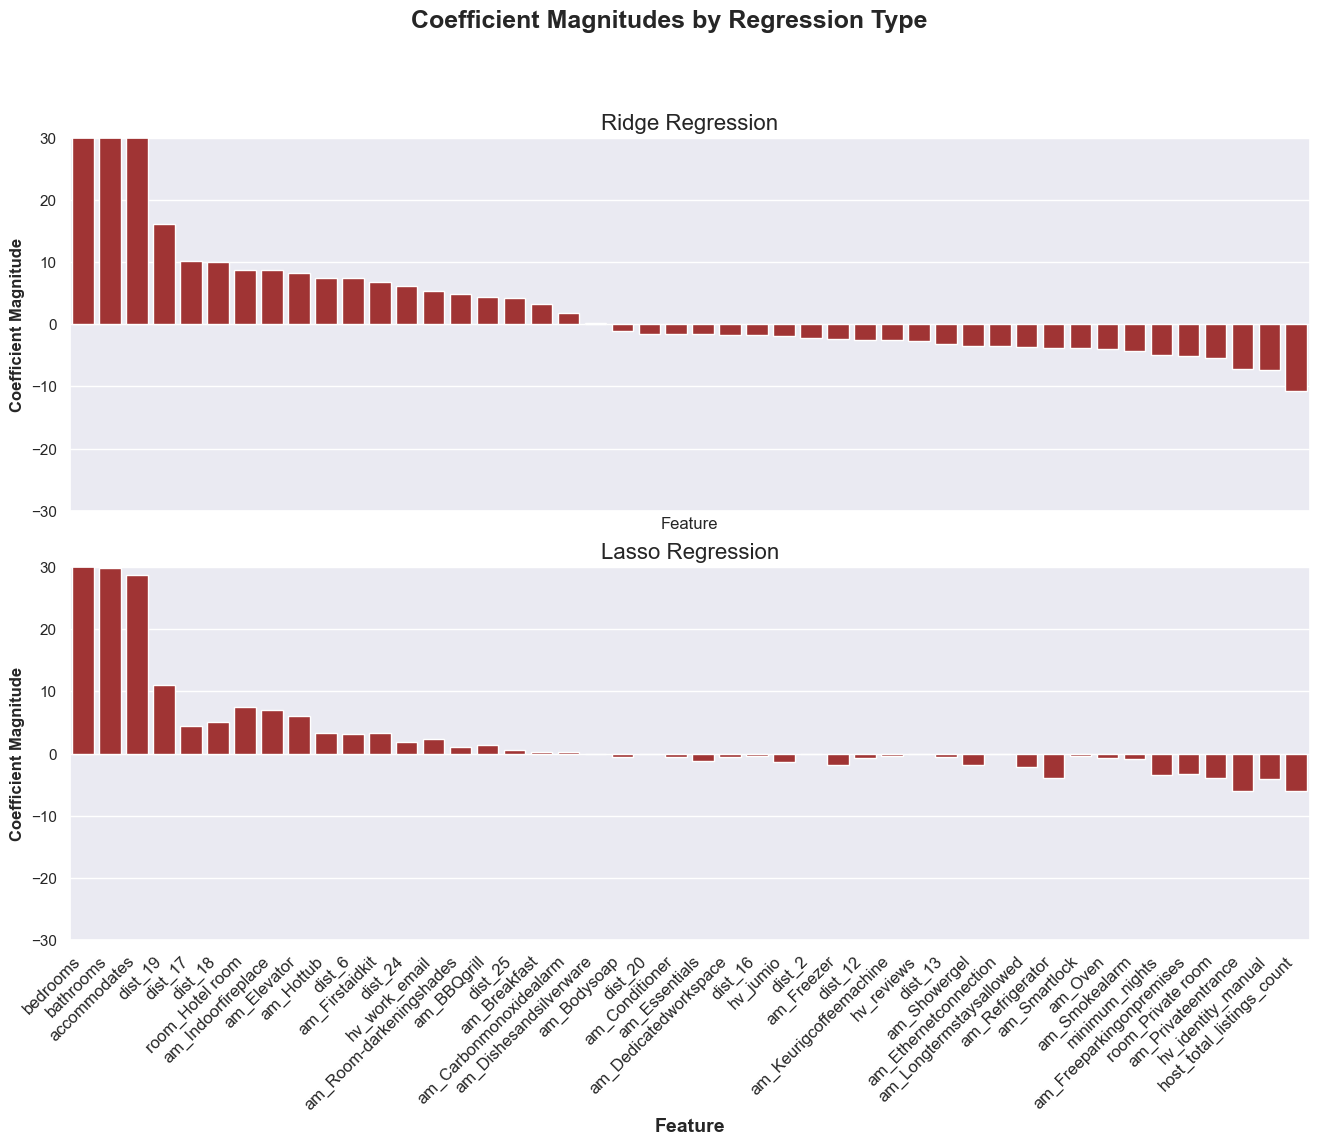

In [71]:
plt.figure(figsize=(16,16))
plt.subplots_adjust(hspace=0.15)

# Set overall title for plot
plt.suptitle('Coefficient Magnitudes by Regression Type', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .96)

# Create a bar plot of regression coefficients for linear regression
plt.subplot(311)
chart1 = sns.barplot(x = index, y = "ridge_coeff_4.85", data = df_coef, color = 'firebrick')
chart1.set_title("Ridge Regression", fontdict = {'fontsize' : 16})
chart1.set_ylim([-30, 30])
chart1.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart1.tick_params(labelbottom=False)   # Remove bottom tick labels


# Create a bar plot of regression coefficients for lasso regression
plt.subplot(312)
chart3 = sns.barplot(x = index, y = "lasso_coeff_3", data = df_coef, color = 'firebrick')
chart3.set_title("Lasso Regression", fontdict = {'fontsize' : 16})
chart3.set_ylim([-30, 30])
chart3.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart3.set_xticklabels(index, rotation=45, ha='right', fontsize='12')
chart3.set_xlabel('Feature', fontweight='bold', fontsize='14', ha='center')

plt.show()


<div style="background-color:#4a86e8;  color:white; padding:20px">
<h2>  SUMMARY OF RIDGE REGRESSION </h2>
</div>

* Ridge regression was done with 'price' as the target variable and the 47 features obtained from lasso regression.
* Optimal alhpa obtained through running a grid search is 4.85 with an accuracy score of 0.55
* Th highest lasso coefficient is found for the bedrooms, bathrooms and accomadates which indicates that theses are the most important factors influencing the price of the listings.
* From the prediction result (df_results) , we can see the ridge regression is able to predict better than lasso regression.


<div style="background-color:#45b8ac; color:white; padding:20px">
<h2> 8. PREDICTIVE MODELING FOR IDENTIFYING GREAT VALUE AIRBNB LISTINGS </h2>
</div>

  - **Objective:** Develop a predictive model to identify Airbnb listings considered as great value.
- **Importance for Hosts:** 
  - Enhances the attractiveness of a property.
  - Leads to increased bookings and higher occupancy rates.
  - Results in greater profitability.
- **Importance for Guests:**
  - Helps easily identify listings that offer the best value for money.
  - Ensures a more satisfying and cost-effective travel experience.
- **Key Factors:** 
  - Price
  - Guest reviews score
- **Great Value Calculation:**
  - A listing is considered a great value if its price is below the median price of all listings and its review scores value is 9 or higher.
  - `df['great_value'] = ((df['price'] < median_price) & (df['review_scores_value'] >= 9)).astype(int)'


In [72]:
# dataset used
great_val_df = df_listings_rev[df_listings_rev['price'] <= 800]
great_val_df .info(verbose =True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5121
Data columns (total 197 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    listing_id                                    5051 non-null   int64  
 1    name                                          5051 non-null   object 
 2    description                                   5031 non-null   object 
 3    host_id                                       5051 non-null   int64  
 4    host_name                                     5045 non-null   object 
 5    host_since                                    5051 non-null   float64
 6    host_response_rate                            4334 non-null   object 
 7    host_acceptance_rate                          4731 non-null   object 
 8    host_is_superhost                             5051 non-null   int64  
 9    host_neighbourhood                            2201

In [73]:
#Takes the values of 2 in the superhost column and converts them into 1.
great_val_df["host_is_superhost"]=great_val_df["host_is_superhost"].apply(lambda x: 1 if x > 1 else x)
#Takes the values of 2 in the host_identity_verified column and converts them into 1.
great_val_df["host_identity_verified"]=great_val_df["host_identity_verified"].apply(lambda x: 1 if x > 1 else x)


In [74]:
# seeing the review_scores_value values
great_val_df['review_scores_value'].value_counts()

10.0    3736
9.0     1095
8.0      152
6.0       23
7.0       21
2.0       10
4.0        8
5.0        5
3.0        1
Name: review_scores_value, dtype: int64

In [75]:
# creating great_value binary variable
# Calculate the median price
median_price = great_val_df['price'].median()

# Create the 'great_value' binary variable
great_val_df['great_value'] = ((great_val_df['price'] < median_price) & (great_val_df['review_scores_value'] >= 9)).astype(int)
great_val_df.head(2)

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,great_value
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,Nashville,36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,25613,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,95811,Nell,4102.0,100%,100%,1,NaN,1.0,1.0,1,1,Nashville,36.17826,-86.74162,Private room in house,Private room,2,1.0,1.0,1.0,75.0,2,30,1,0,0,0,63,510,4,0,4064.0,453.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,3.87,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0

###  Create the X and y datasets 

In [76]:
# Filter columns with object datatype
object_columns = great_val_df.select_dtypes(include=['object']).columns

# Display the columns with object datatype
print("Columns with object datatype:")
print(object_columns)

Columns with object datatype:
Index(['name', 'description', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood',
       'property_type', 'room_type'],
      dtype='object')


In [77]:
#Create the X dataset by dropping the features/targets not needed
X = great_val_df.drop(['name', 'description', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood',
       'property_type', 'room_type','listing_id','host_id','great_value'], axis=1)

#Create the target 
y = great_val_df['great_value']

In [78]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: great_value, dtype: int64

In [79]:
# removing some more unwanted features
X=X.drop(['latitude','longitude','host_total_listings_count','host_has_profile_pic','availability_30','availability_60','availability_90',
         'number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','reviews_per_month','hv_None'],axis=1)


In [80]:
X=X.drop(['has_availability','availability_365','price','review_scores_value','host_since'],axis=1)

In [81]:
X.info(verbose =True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5121
Data columns (total 168 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    host_is_superhost                             5051 non-null   int64  
 1    host_listings_count                           5051 non-null   float64
 2    host_identity_verified                        5051 non-null   int64  
 3    accommodates                                  5051 non-null   int64  
 4    bathrooms                                     5051 non-null   float64
 5    bedrooms                                      5051 non-null   float64
 6    beds                                          5051 non-null   float64
 7    minimum_nights                                5051 non-null   int64  
 8    maximum_nights                                5051 non-null   int64  
 9    number_of_reviews                             5051

###  Split the data 

In [82]:
#Split the raw data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
 y_test.head()

4779    0
698     0
65      1
3481    0
4751    1
Name: great_value, dtype: int64

In [84]:
#standardize the data

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)


<div style="background-color:#45b8ac; color:white; padding:20px">
<h2> 9. LOGISTIC REGRESSION  </h2>
</div>

In [85]:
#Import functions for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
# Run a Logistic Regression with each dataset (raw and scaled) and create predicted results DataFrame
scale = [(X_train, X_test, 'Raw'), (X_train_sc, X_test_sc, 'StdScale')]


model = LogisticRegression(random_state=21)

#Creates a DataFrame for aggregattion of results
df_results_scaled = pd.DataFrame(y_test).reset_index()

for vartrain, vartest, name in scale:
    model.fit(vartrain, y_train)
    score = model.score(vartest, y_test)
    
    model_pred = model.predict(vartest)
    df_model_pred = pd.DataFrame(model_pred, columns=[name])
    
    df_results_scaled = pd.concat([df_results_scaled, df_model_pred], axis=1)
    
    print('----------------')
    print('Results: ' + name)
    display(round(score, 6))
    print(confusion_matrix(y_test, model_pred))

df_results_scaled.sample(10, random_state=102)

----------------
Results: Raw


0.827177

[[674 143]
 [119 580]]
----------------
Results: StdScale


0.835092

[[684 133]
 [117 582]]


,index,great_value,Raw,StdScale
1168,1749,0,1,0
65,506,1,1,1
1344,628,0,1,1
32,502,1,1,1
499,4522,1,1,1
391,742,0,0,0
1159,4247,1,1,1
1511,1044,0,0,1
693,4322,0,0,1
1391,3840,1,1,1


* Decided to move forward with scaled data

In [87]:
#Create a Defined Function for Building a Model
def modeltraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)

    
    #Assess with the model
    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')


    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show();

    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')


    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.835092

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[684 133]
 [117 582]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       817
           1       0.81      0.83      0.82       699

    accuracy                           0.84      1516
   macro avg       0.83      0.83      0.83      1516
weighted avg       0.84      0.84      0.84      1516


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



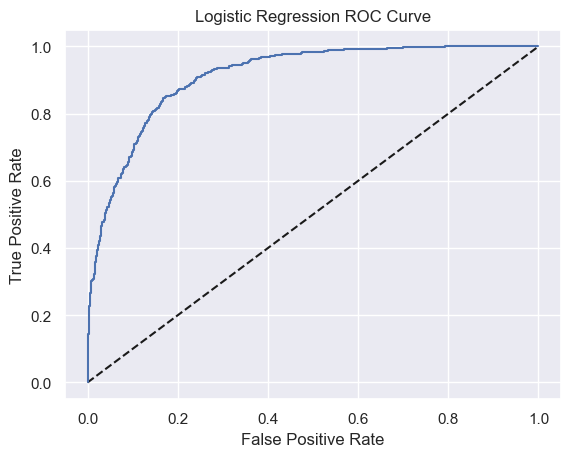

ROC AUC Score: 0.9120

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.81329562 0.81612447 0.81329562 0.78925035 0.82319661]

CV ROC AUC:
[0.88298179 0.88841928 0.89269388 0.88036731 0.90224557]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

#Declare the variables for a model and apply to the function
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

In [89]:
#Create a Short Version of a Defined Function for Building a Model
def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)


    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print("")

    #Assess with the model
    score = model.score(vartest, y_test)
    score_format = 'Accuracy Score: {0:.4f}'.format(score)
    print(score_format)

    recall = recall_score(y_test, model_pred)
    recall_format = 'Recall Score: {0:.4f}'.format(recall)
    print(recall_format)
    
    precision = precision_score(y_test, model_pred)
    precision_format = 'Precision Score: {0:.4f}'.format(precision)
    print(precision_format)
    
    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')

In [90]:
from sklearn.metrics import precision_score, recall_score
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc
model = LogisticRegression(random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[684 133]
 [117 582]]

Accuracy Score: 0.8351
Recall Score: 0.8326
Precision Score: 0.8140
ROC AUC Score: 0.9120



### Grid Search 

In [91]:
%%time

#Code Block 63

from sklearn.model_selection import GridSearchCV


grid={"C":[0.001, 0.01, 0.1, 1, 5, 10], "penalty":["l1","l2"],
     "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:5}], "solver":['lbfgs', 'liblinear']}
logreg=LogisticRegression(random_state=21)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(vartrain,y_train)

print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8186720763111985
CPU times: user 17min 43s, sys: 10min 56s, total: 28min 39s
Wall time: 12min 29s


### Optimal Logistic Regression Model based on Grid Search

In [92]:
%time

#Code Block 64

#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = 'balanced', penalty = 'l2', solver = 'lbfgs')


shorttraintest(vartrain, vartest, y_train, y_test, model)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
Confusion Matrix:
[[655 162]
 [ 99 600]]

Accuracy Score: 0.8278
Recall Score: 0.8584
Precision Score: 0.7874
ROC AUC Score: 0.9153



### Decision model

In [93]:
cw = [None, {0:1, 1:1}, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train_sc
vartest = X_test_sc

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight=varcw)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[675 142]
 [108 591]]

Accuracy Score: 0.8351
Recall Score: 0.8455
Precision Score: 0.8063
ROC AUC Score: 0.9154

----------------------
Model with Class Weight: {0: 1, 1: 1}

Confusion Matrix:
[[675 142]
 [108 591]]

Accuracy Score: 0.8351
Recall Score: 0.8455
Precision Score: 0.8063
ROC AUC Score: 0.9154

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[655 162]
 [ 99 600]]

Accuracy Score: 0.8278
Recall Score: 0.8584
Precision Score: 0.7874
ROC AUC Score: 0.9153

----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[627 190]
 [ 67 632]]

Accuracy Score: 0.8305
Recall Score: 0.9041
Precision Score: 0.7689
ROC AUC Score: 0.9147

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[600 217]
 [ 51 648]]

Accuracy Score: 0.8232
Recall Score: 0.9270
Precision Score: 0.7491
ROC AUC Score: 0.9139

----------------------
Model with C

In [94]:
# Decision Logistic Regression Model based on Analyzing the Precision/Recall
%time

#Code Block 65

#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = {0:1, 1:2}, penalty = 'l2', solver = 'lbfgs')


shorttraintest(vartrain, vartest, y_train, y_test, model)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.9 µs
Confusion Matrix:
[[600 217]
 [ 51 648]]

Accuracy Score: 0.8232
Recall Score: 0.9270
Precision Score: 0.7491
ROC AUC Score: 0.9139



### Optimal Model:

Confusion Matrix:
[[655 162]
 [ 99 600]]

Accuracy Score: 0.8278
Recall Score: 0.8584
Precision Score: 0.7874
ROC AUC Score: 0.9153



,Pred_OPT_Log
0,0
1,0


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.827836

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[655 162]
 [ 99 600]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       817
           1       0.79      0.86      0.82       699

    accuracy                           0.83      1516
   macro avg       0.83      0.83      0.83      1516
weighted avg       0.83      0.83      0.83      1516


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



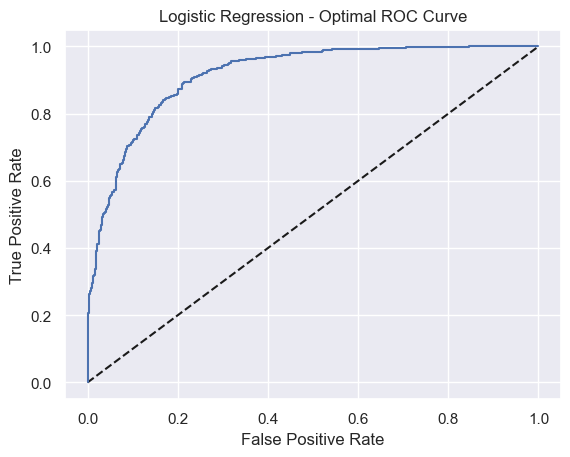

ROC AUC Score: 0.9153

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.83026874 0.8175389  0.81612447 0.79773692 0.83168317]

CV ROC AUC:
[0.88942979 0.89216457 0.89457053 0.88466597 0.90429064]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [95]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(C=0.01, class_weight = 'balanced', penalty = 'l2', solver = 'lbfgs')

shorttraintest(vartrain, vartest, y_train, y_test, model)
vartrain = X_train_sc
vartest = X_test_sc

model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'Pred_OPT_Log'})

df_model_prob = pd.DataFrame(model_prob)
df_model_prob = df_model_prob.rename(columns = {0:'Prob_OPT_Not_Great_value', 1:'Prob_OPT_Great_value'})

display(df_model_pred.head(2))
df_model_prob.head(2)

#Assess with the model
score = model.score(vartest, y_test)

print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
print(round(score, 6))
print("")


print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
cm_opt = confusion_matrix(y_test, model_pred)
print(cm_opt)
print("")


print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
print(classification_report(y_test, model_pred))
print('')


print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
print('')
y_pred_prob = model.predict_proba(vartest)[:,1]

fpr_opt, tpr_opt, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_opt, tpr_opt, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Optimal ROC Curve')
plt.show();

# calculate roc curve
y_pred_prob = model.predict_proba(vartest)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')


print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
print('')
cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
scoring='accuracy')
print('CV Accuracy Scores:')
print(cv_scores)
print('')
cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
scoring='roc_auc')
print('CV ROC AUC:')
print(cv_rocauc)

print('')
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [96]:
#Concatenating dataframes

df_model_results = pd.concat([df_results_scaled, df_model_pred, df_model_prob], axis=1)
df_model_results.sample(10, random_state=112)
df_model_results = df_model_results.drop(['Raw','StdScale'],axis=1)
df_model_results 

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value
0,4779,0,0,0.812776,0.187224
1,698,0,0,0.905088,0.094912
2,65,1,1,0.015758,0.984242
3,3481,0,0,0.900820,0.099180
4,4751,1,1,0.151322,0.848678
...,...,...,...,...,...
1511,1044,0,1,0.471633,0.528367
1512,1109,1,1,0.075925,0.924075
1513,1486,1,0,0.526884,0.473116
1514,548,0,0,0.785272,0.214728


In [97]:
print('Confusion Matrix:')
display(cm_opt)
print("")

#Assess with the model
score = model.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

Confusion Matrix:


array([[655, 162],
       [ 99, 600]])


Accuracy Score: 0.8278
Recall Score: 0.8584
Precision Score: 0.7874


### DECISION Model based on precision and recall

Accuracy Score: 0.8232
Recall Score: 0.9270
Precision Score: 0.7491

[[600 217]
 [ 51 648]]


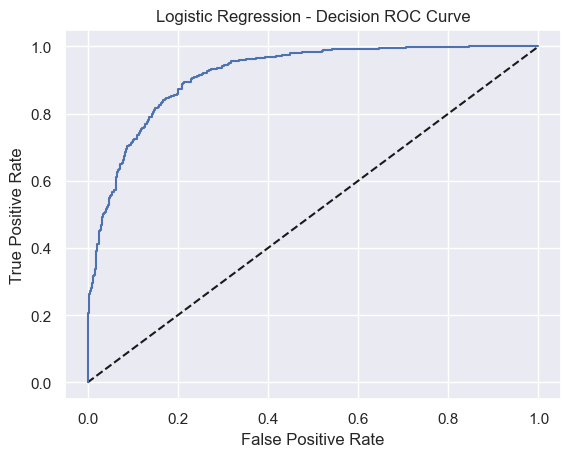

In [98]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = {0:1, 1:2}, penalty = 'l2', solver = 'lbfgs')
#Assess with the model
model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'Pred_DEC_Log'})

df_model_prob = pd.DataFrame(model_prob)
df_model_prob = df_model_prob.rename(columns = {0:'Prob_DEC_Not_great_vale', 1:'Prob_DEC_Great_value'})


score = model.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)
print("")
cm_dec = confusion_matrix(y_test, model_pred)
print(cm_dec)

fpr_dec, tpr_dec, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_dec, tpr_dec, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Decision ROC Curve')
plt.show();


[Text(0, 0.5, 'Not_Great_value'), Text(0, 1.5, 'great_value')]

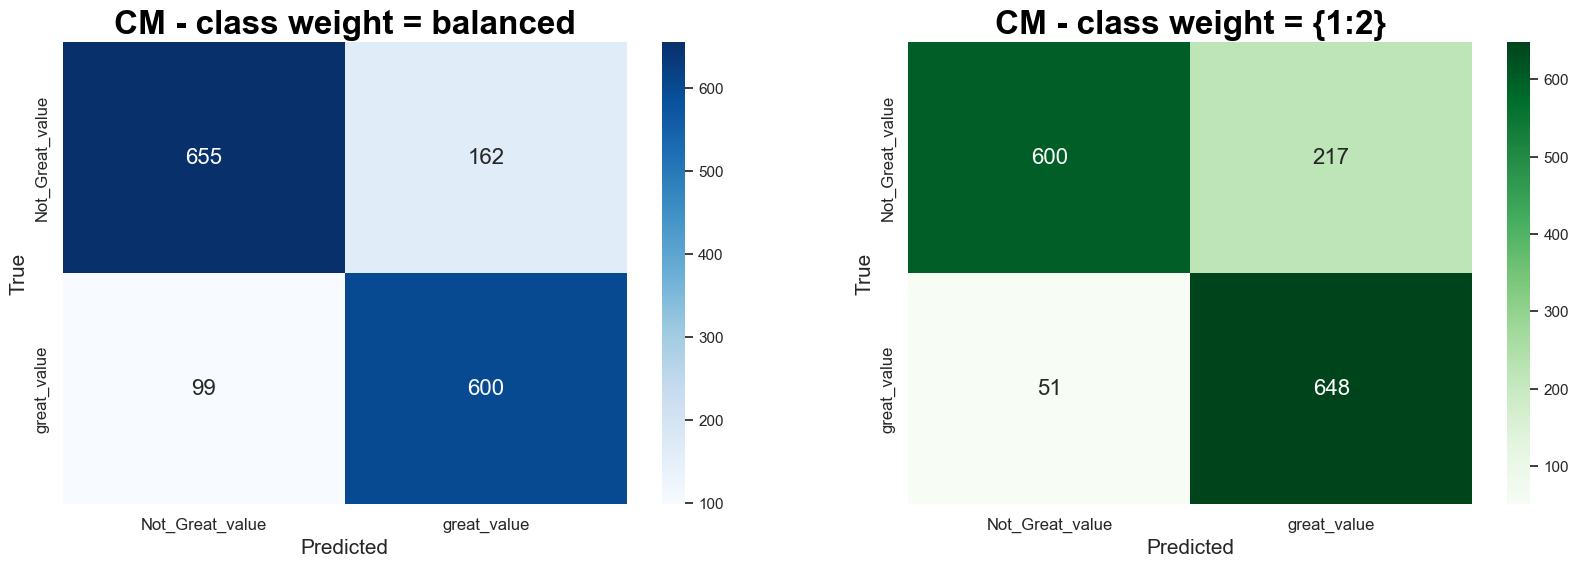

In [99]:
# confusion matrix for optimal and decision model
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = balanced', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_opt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = {1:2}', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dec, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')

In [100]:

#Concatenating dataframes

df_model_results = pd.concat([df_model_results, df_model_pred, df_model_prob], axis=1)
df_model_results.sample(10, random_state=112)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value
264,1308,1,1,0.173108,0.826892,1,0.089071,0.910929
1112,851,1,0,0.534406,0.465594,1,0.413362,0.586638
111,3536,1,1,0.037593,0.962407,1,0.019428,0.980572
234,1115,1,1,0.045719,0.954281,1,0.021495,0.978505
1449,3123,0,0,0.974568,0.025432,0,0.964254,0.035746
19,1796,1,1,0.043835,0.956165,1,0.020977,0.979023
49,773,0,0,0.995940,0.004060,0,0.994315,0.005685
403,1232,0,0,0.577983,0.422017,1,0.475459,0.524541
1324,2335,1,1,0.031720,0.968280,1,0.015730,0.984270
647,3816,1,1,0.132524,0.867476,1,0.068109,0.931891


<div style="background-color:#45b8ac; color:white; padding:20px">
<h2> SUMMARY OF LOGISTIC REGRESSION RESULT </h2>
</div>

**Optimal Model Selected**:
* LogisticRegression(random_state=21, C=0.01, class_weight = 'balanced, penalty = 'l2', solver = 'lbfgs')
* Accuracy score - 0.8278 : model correctly predicted whether a listing is a great value or not 82.78% of the time.
* Recall score - 0.85 :It means that out of all the actual great value listings, model correctly identified 85% of them.
* Precision score - 0.78 :It means that out of all the listings that  model predicted to be great value, 78% were actually great value. 


**Decision Model Selected**:
* LogisticRegression(random_state=21, C=0.01, class_weight = {0:1, 1:2}, penalty = 'l2', solver = 'lbfgs')
* Accuracy score - 0.8232 : model correctly predicted whether a listing is a great value or not 82.32% of the time.
* Recall score - 0.92 :It means that out of all the actual great value listings, model correctly identified 92.70% of them.
* Precision score - 0.74 :It means that out of all the listings that  model predicted to be great value, 74.91% were actually great value. 
 
Out of these two models, decision model did a best job with accuracy of 82% and with better recall score


In [101]:
# prediction and probbailities of optimal and decision logistic regression model
df_model_results.head(20)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value
0,4779,0,0,0.812776,0.187224,0,0.740546,0.259454
1,698,0,0,0.905088,0.094912,0,0.862877,0.137123
2,65,1,1,0.015758,0.984242,1,0.006218,0.993782
3,3481,0,0,0.900820,0.099180,0,0.863719,0.136281
4,4751,1,1,0.151322,0.848678,1,0.094474,0.905526
5,397,1,1,0.238326,0.761674,1,0.128038,0.871962
6,1439,1,1,0.023337,0.976663,1,0.011016,0.988984
7,648,0,0,0.604479,0.395521,1,0.452904,0.547096
8,2873,0,0,0.710205,0.289795,0,0.586440,0.413560
9,1757,0,0,0.865085,0.134915,0,0.796349,0.203651


<div style="background-color:#8e4585; color:white; padding:20px">
<h2> 10. DECISION TREE MODELLING </h2>
</div>

* Descion tree modellings is done to classify the great_value
* Finetuning of the model is conducted to find the best model for accuracy(OPTIMAL MODEL)
* By changing the class weights , DECISION model based on precision and recall has been obtained.

In [102]:
#Import functions for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [103]:
#Set the properties for the model (model)
model = DecisionTreeClassifier(random_state=21)


In [104]:
#Fit the model with the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [105]:
#Create DataFrames for predictions and probabilities
model_pred = pd.DataFrame(model_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Tree'})


display(model_pred.sample(5, random_state=244))

,Predict_Tree
625,1
1262,1
392,1
11,1
1227,1


In [106]:
#Assess the accuracy with the test data
#Accuracy Score
score = model.score(X_test, y_test)
print(score)

0.7724274406332454


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.772427

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[637 180]
 [165 534]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       817
           1       0.75      0.76      0.76       699

    accuracy                           0.77      1516
   macro avg       0.77      0.77      0.77      1516
weighted avg       0.77      0.77      0.77      1516


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



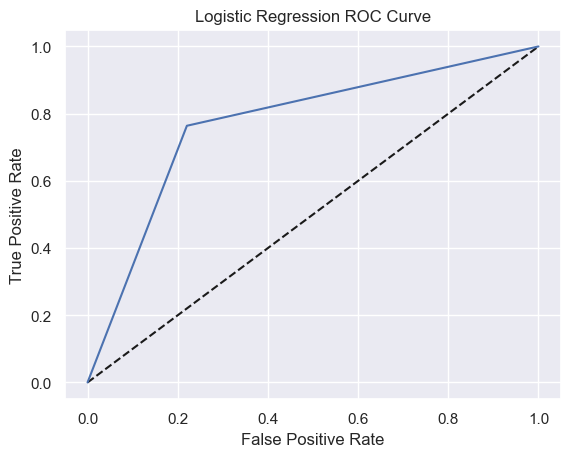

ROC AUC Score: 0.7718

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.75671853 0.78217822 0.77652051 0.7708628  0.76944837]

CV ROC AUC:
[0.75671666 0.78262892 0.77629722 0.77023017 0.76834951]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [107]:
#Declare the variables for a model and apply to the function
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

### Fine-tune the model to find the OPTIMAL model

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done


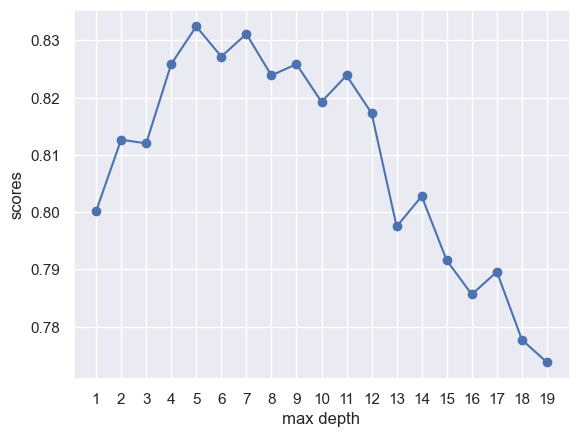

In [108]:
#Manually Setting the Properties for Decision Tree 
est = range(1,20)
scores = []
var_est = 'max depth'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done


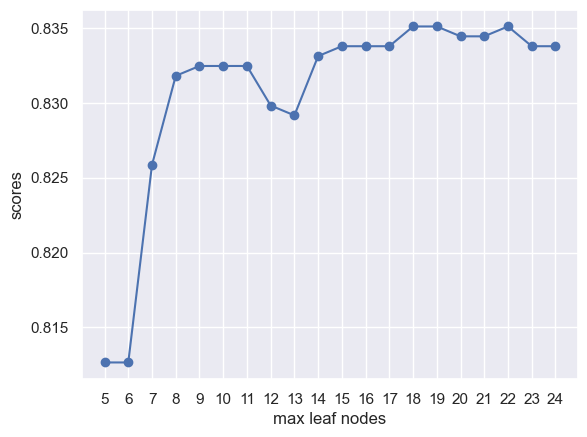

In [109]:
# to find max_leaf_nodes
figsize=(20, 5)
est = range(5,25)
scores = []
var_est = 'max leaf nodes'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()


### Grid search to get the OPTIMAL model

In [110]:
#Grid Search
%time

#Code Block 41

from sklearn.model_selection import GridSearchCV


grid={"criterion": ['gini', 'entropy'], "max_depth" : [3, 4, 5, 6, 7],
      "max_leaf_nodes" : [ 14, 16,18,20,22],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=GridSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)


print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 16.9 µs
tuned hyperparameters :(best parameters)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 14}
accuracy : 0.8


Confusion Matrix:
[[659 158]
 [101 598]]

Accuracy Score: 0.8292
Recall Score: 0.8555
Precision Score: 0.7910


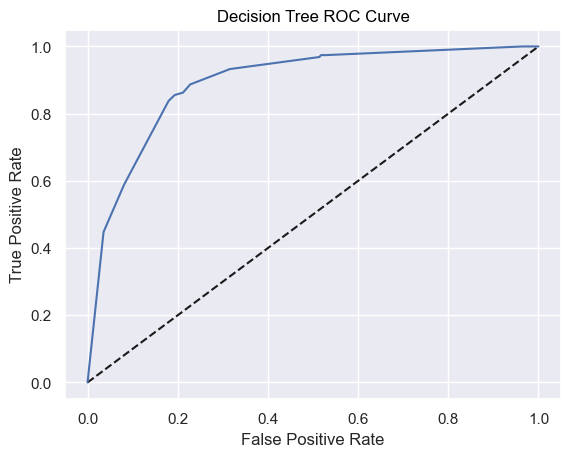

In [112]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 14, 
                               class_weight=None, criterion = 'gini', random_state = 21)

#Assess with the model
model_dt.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt.predict(vartest)
model_prob = model_dt.predict_proba(vartest)

df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'pred_OPT_dt'})

print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt.predict_proba(vartest)[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

In [113]:
#concatenating with previous results of logistic regression
df_model_results_2 = pd.concat([df_model_results, df_model_pred],axis = 1)
df_model_results_2.sample(10, random_state = 112)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value,pred_OPT_dt
264,1308,1,1,0.173108,0.826892,1,0.089071,0.910929,1
1112,851,1,0,0.534406,0.465594,1,0.413362,0.586638,1
111,3536,1,1,0.037593,0.962407,1,0.019428,0.980572,1
234,1115,1,1,0.045719,0.954281,1,0.021495,0.978505,1
1449,3123,0,0,0.974568,0.025432,0,0.964254,0.035746,0
19,1796,1,1,0.043835,0.956165,1,0.020977,0.979023,1
49,773,0,0,0.995940,0.004060,0,0.994315,0.005685,0
403,1232,0,0,0.577983,0.422017,1,0.475459,0.524541,0
1324,2335,1,1,0.031720,0.968280,1,0.015730,0.984270,1
647,3816,1,1,0.132524,0.867476,1,0.068109,0.931891,1


### Fine-tune the model to find the DECISION model 

* change the class weights for the model to identify the parameters for the DECISION model (based on precision and recall).

In [114]:
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 14, 
                               class_weight=varcw, criterion = 'gini', random_state = 21)#Assess with the model
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')


----------------------
Model with Class Weight: None

Confusion Matrix:
[[659 158]
 [101 598]]

Accuracy Score: 0.8292
Recall Score: 0.8555
Precision Score: 0.7910
ROC AUC Score: 0.8918

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[659 158]
 [101 598]]

Accuracy Score: 0.8292
Recall Score: 0.8555
Precision Score: 0.7910
ROC AUC Score: 0.8918

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[621 196]
 [ 63 636]]

Accuracy Score: 0.8292
Recall Score: 0.9099
Precision Score: 0.7644
ROC AUC Score: 0.8823

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[536 281]
 [ 33 666]]

Accuracy Score: 0.7929
Recall Score: 0.9528
Precision Score: 0.7033
ROC AUC Score: 0.8789

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[383 434]
 [ 14 685]]

Accuracy Score: 0.7045
Recall Score: 0.9800
Precision Score: 0.6122
ROC AUC Score: 0.8518

----------------------
Model with Cla

Confusion Matrix:
[[621 196]
 [ 63 636]]

Accuracy Score: 0.8292
Recall Score: 0.9099
Precision Score: 0.7644


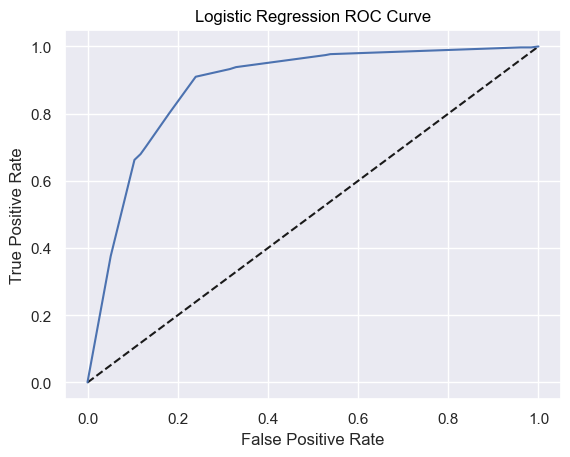

In [115]:
#Finding the decision model

#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt_3 = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 14, 
                               class_weight={0: 1, 1: 2}, criterion = 'gini', random_state = 21)

#Assess with the model
model_dt_3.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt_3.predict(vartest)
model_prob = model_dt_3.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns={0:'pred_DEC_dt'})
df_model_pred.head()


print('Confusion Matrix:')
cm_dt_3 = confusion_matrix(y_test, model_pred)
print(cm_dt_3)
print("")

#Assess with the model
score = model_dt_3.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt_3.predict_proba(vartest)[:,1]

dt_3_fpr, dt_3_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_3_fpr, dt_3_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [116]:
#concatenating with previous results of logistic regression, optimal decision tree modelling
df_model_results_2 = pd.concat([df_model_results_2, df_model_pred],axis = 1)
df_model_results_2.sample(10, random_state = 112)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value,pred_OPT_dt,pred_DEC_dt
264,1308,1,1,0.173108,0.826892,1,0.089071,0.910929,1,1
1112,851,1,0,0.534406,0.465594,1,0.413362,0.586638,1,1
111,3536,1,1,0.037593,0.962407,1,0.019428,0.980572,1,1
234,1115,1,1,0.045719,0.954281,1,0.021495,0.978505,1,1
1449,3123,0,0,0.974568,0.025432,0,0.964254,0.035746,0,0
19,1796,1,1,0.043835,0.956165,1,0.020977,0.979023,1,1
49,773,0,0,0.995940,0.004060,0,0.994315,0.005685,0,0
403,1232,0,0,0.577983,0.422017,1,0.475459,0.524541,0,0
1324,2335,1,1,0.031720,0.968280,1,0.015730,0.984270,1,1
647,3816,1,1,0.132524,0.867476,1,0.068109,0.931891,1,1


[Text(0, 0.5, 'Not_Great_value'), Text(0, 1.5, 'great_value')]

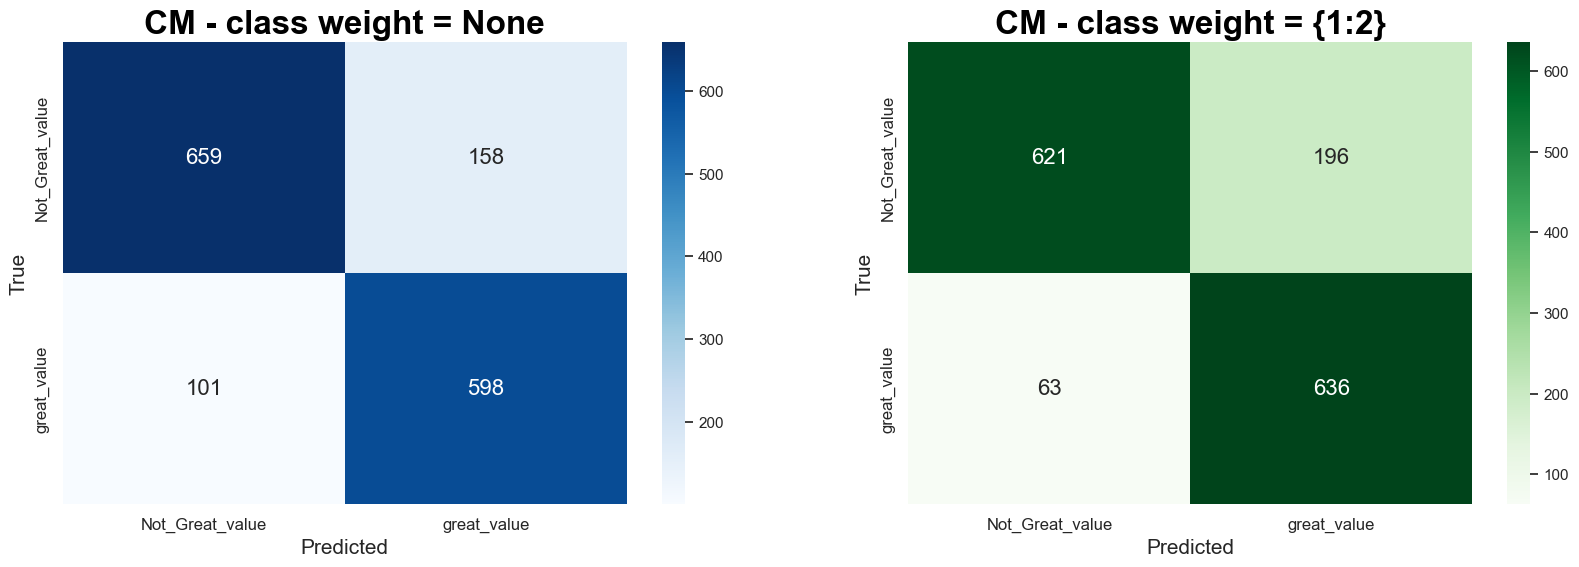

In [117]:
# comparing optimal and decision model
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = None', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = {1:2}', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt_3, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')

<div style="background-color:#8e4585; color:white; padding:20px">
<h2> SUMMARY OF DECISION TREE RESULT </h2>
</div>

**Optimal Model Selected**:
* DecsionTreeClasifier(random_state=21, max_depth=6,max_leaf_nodes = 14, class_weight = 'None', criterion = 'gini')
* Accuracy score - 0.82
* Recall score - 0.85
* Precision score - 0.79

**Decision Model Selected**:
* DecsionTreeClasifier(random_state=21,max_depth = 6, max_leaf_nodes = 14, class_weight = {0:1, 1:2}, criterion = 'gini')
* Accuracy score - 0.82
* Recall score - 0.90
* Precision score - 0.76


In [118]:
df_model_results_2

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value,pred_OPT_dt,pred_DEC_dt
0,4779,0,0,0.812776,0.187224,0,0.740546,0.259454,0,0
1,698,0,0,0.905088,0.094912,0,0.862877,0.137123,0,0
2,65,1,1,0.015758,0.984242,1,0.006218,0.993782,1,1
3,3481,0,0,0.900820,0.099180,0,0.863719,0.136281,0,0
4,4751,1,1,0.151322,0.848678,1,0.094474,0.905526,1,1
...,...,...,...,...,...,...,...,...,...,...
1511,1044,0,1,0.471633,0.528367,1,0.334331,0.665669,0,0
1512,1109,1,1,0.075925,0.924075,1,0.043269,0.956731,1,1
1513,1486,1,0,0.526884,0.473116,1,0.399679,0.600321,1,1
1514,548,0,0,0.785272,0.214728,0,0.711800,0.288200,1,1


In [119]:
# viewing important features
X_names = pd.DataFrame(list(X.columns))
df_fi = pd.DataFrame(model_dt.feature_importances_)
#data frame showing important featyre in optimal model
df_fi_3 = pd.DataFrame(model_dt_3.feature_importances_)
#data frame showing important featyre in decision model
df_fi_3 = pd.DataFrame(model_dt_3.feature_importances_)
# concatenating both dataframes
df_feat_imp = pd.concat([X_names, df_fi, df_fi_3], axis = 1)
df_feat_imp.columns = ['Features', 'dt_importance', 'dt_3_importance']
df_feat_imp
#Shows all features that are above 0
df_feat_imp[(df_feat_imp['dt_3_importance']!=0) | (df_feat_imp['dt_importance']!=0)].sort_values('dt_3_importance', ascending = False)


,Features,dt_importance,dt_3_importance
4,bathrooms,0.651756,0.644226
3,accommodates,0.047003,0.120363
10,review_scores_rating,0.068042,0.064810
1,host_listings_count,0.031975,0.056120
7,minimum_nights,0.025166,0.038559
125,room_Hotel room,0.026279,0.034498
166,response_within_hour,0.030528,0.017986
17,calculated_host_listings_count,0.000000,0.012056
61,am_Gym,0.000000,0.011381
5,bedrooms,0.058401,0.000000


<div style="background-color:#cc5500; color:white; padding:20px">
<h2> 12. RANDOM FOREST MODELLING </h2>
</div>

* Random Forest modelling is done to classify the great_value
* Finetuning of the model is conducted to find the best model for accuracy(OPTIMAL MODEL)
* By changing the class weights , DECISION model based on precision and recall has been obtained.

In [120]:
#Import functions for Decision Tree
from sklearn.ensemble import RandomForestClassifier

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.87533

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[705 112]
 [ 77 622]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       817
           1       0.85      0.89      0.87       699

    accuracy                           0.88      1516
   macro avg       0.87      0.88      0.87      1516
weighted avg       0.88      0.88      0.88      1516


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



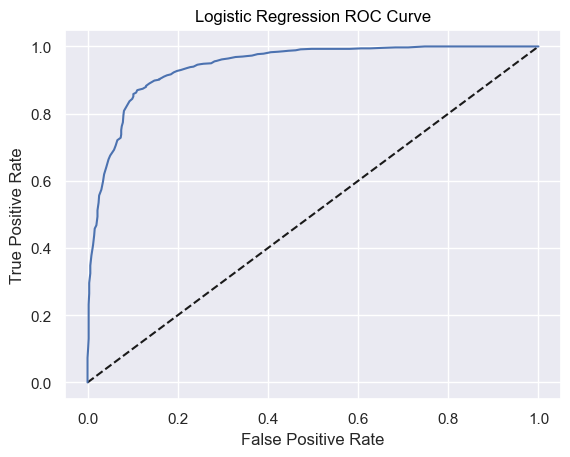

ROC AUC Score: 0.9419

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.86562942 0.82743989 0.85289958 0.8330976  0.84865629]

CV ROC AUC:
[0.92936883 0.91373807 0.92766461 0.90143155 0.92130885]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [121]:
#Run a Random Forest Classifier with default parameters
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

### Grid Search for Random Forest

In [122]:
%%time

#Code Block 26

grid={"max_depth" : [ 12, 14, 16, 18], "criterion": ['gini', 'entropy'],
      "n_estimators" : [50], "max_features" : [10, 12, 14, 16],
      "class_weight": [None]}
model_grid = RandomForestClassifier(random_state=21, n_jobs=-2)
model_cv=GridSearchCV(model_grid,grid,cv=5)
model_cv.fit(vartrain,y_train)


print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 16, 'n_estimators': 50}
accuracy : 0.8463932107496465
CPU times: user 7.37 s, sys: 2.2 s, total: 9.56 s
Wall time: 33.4 s


### The Final Random Forest with Feature Importance

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 11 µs
XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.868734

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[699 118]
 [ 81 618]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       817
           1       0.84      0.88      0.86       699

    accuracy                           0.87      1516
   macro avg       0.87      0.87      0.87      1516
weighted avg       0.87      0.87      0.87      1516


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



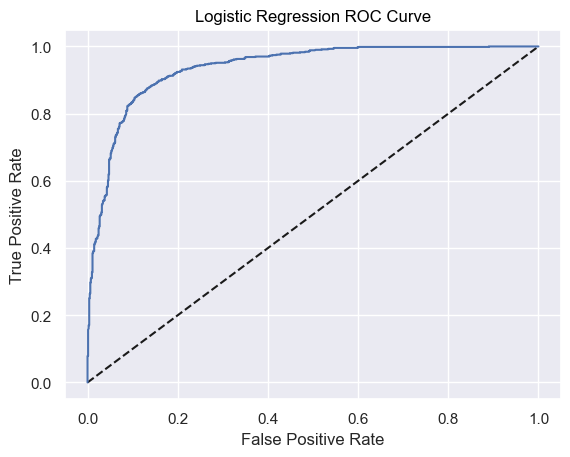

ROC AUC Score: 0.9367

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.87128713 0.83734088 0.85289958 0.8330976  0.83734088]

CV ROC AUC:
[0.9280656  0.91438768 0.92574785 0.90076991 0.92045874]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [123]:
# OPTIMAL random forest model based on accuracy
%time

#Code Block 27

#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model = RandomForestClassifier(max_depth = 18, max_features = 16, n_estimators = 50, class_weight=None, criterion = 'entropy', random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

In [124]:
# Finding important features
df_fi = pd.DataFrame(model.feature_importances_)
#Create list of column names
X_names = pd.DataFrame(list(X.columns))
# Create a Dataframe with the important features
df_feat_imp = pd.concat([df_fi, X_names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp[df_feat_imp['Importance']!=0].sort_values('Importance', ascending = False)


,Importance,Features
5,0.078055,bedrooms
4,0.076065,bathrooms
6,0.066996,beds
3,0.064363,accommodates
9,0.052260,number_of_reviews
...,...,...
115,0.000128,hv_manual_offline
119,0.000103,hv_photographer
116,0.000087,hv_manual_online
122,0.000071,hv_sent_id


Confusion Matrix:
[[699 118]
 [ 81 618]]

Accuracy Score: 0.8687
Recall Score: 0.8841
Precision Score: 0.8397


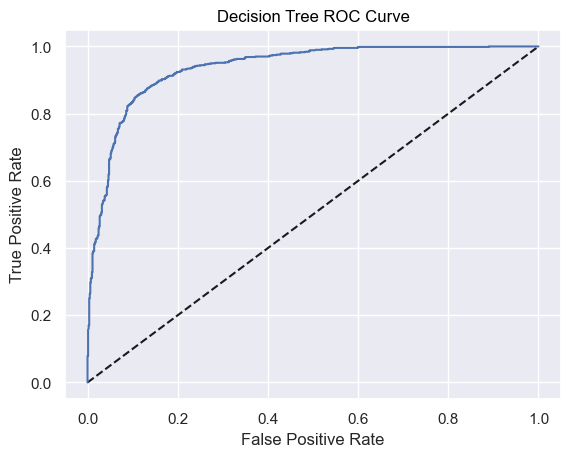

In [125]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt =  RandomForestClassifier(max_depth = 18, max_features = 16,n_estimators = 50 , class_weight=None, criterion = 'entropy', random_state=21)

#Assess with the model
model_dt.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt.predict(vartest)
model_prob = model_dt.predict_proba(vartest)

df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'pred_OPT_RF'})

print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt.predict_proba(vartest)[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

In [126]:
#concatenating with previous results of logistic regression, optimal decision tree modelling
df_model_results_2 = pd.concat([df_model_results_2, df_model_pred],axis = 1)
df_model_results_2.sample(10, random_state = 112)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value,pred_OPT_dt,pred_DEC_dt,pred_OPT_RF
264,1308,1,1,0.173108,0.826892,1,0.089071,0.910929,1,1,1
1112,851,1,0,0.534406,0.465594,1,0.413362,0.586638,1,1,1
111,3536,1,1,0.037593,0.962407,1,0.019428,0.980572,1,1,1
234,1115,1,1,0.045719,0.954281,1,0.021495,0.978505,1,1,1
1449,3123,0,0,0.974568,0.025432,0,0.964254,0.035746,0,0,0
19,1796,1,1,0.043835,0.956165,1,0.020977,0.979023,1,1,1
49,773,0,0,0.995940,0.004060,0,0.994315,0.005685,0,0,0
403,1232,0,0,0.577983,0.422017,1,0.475459,0.524541,0,0,0
1324,2335,1,1,0.031720,0.968280,1,0.015730,0.984270,1,1,1
647,3816,1,1,0.132524,0.867476,1,0.068109,0.931891,1,1,1


### Fine-tune the model to find the DECISION model

* Change the class weights for the model to identify the parameters for the DECISION model (based on precision and recall).

In [127]:
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:7.5}, {0:1, 1:10}, {0:1, 1:25},  {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = RandomForestClassifier(max_depth = 10, max_features = 14, n_estimators = 50, 
                                   class_weight=varcw, criterion = 'entropy', random_state=21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')


----------------------
Model with Class Weight: None

Confusion Matrix:
[[683 134]
 [ 81 618]]

Accuracy Score: 0.8582
Recall Score: 0.8841
Precision Score: 0.8218
ROC AUC Score: 0.9335

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[672 145]
 [ 78 621]]

Accuracy Score: 0.8529
Recall Score: 0.8884
Precision Score: 0.8107
ROC AUC Score: 0.9321

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[620 197]
 [ 49 650]]

Accuracy Score: 0.8377
Recall Score: 0.9299
Precision Score: 0.7674
ROC AUC Score: 0.9331

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[569 248]
 [ 35 664]]

Accuracy Score: 0.8133
Recall Score: 0.9499
Precision Score: 0.7281
ROC AUC Score: 0.9341

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[520 297]
 [ 23 676]]

Accuracy Score: 0.7889
Recall Score: 0.9671
Precision Score: 0.6948
ROC AUC Score: 0.9299

----------------------
Model with Cla

Confusion Matrix:
[[688 129]
 [ 64 635]]

Accuracy Score: 0.8727
Recall Score: 0.9084
Precision Score: 0.8312


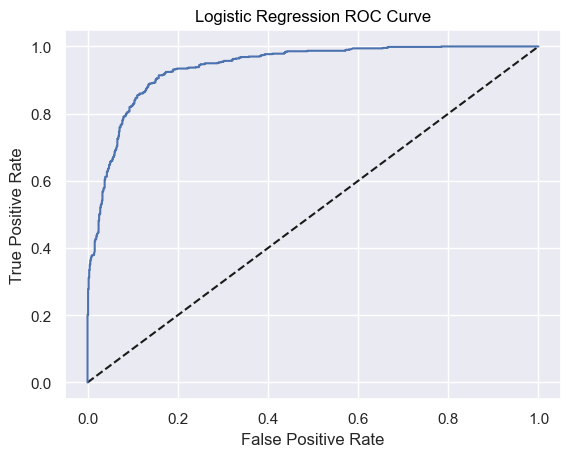

In [128]:
#Finding the decision model

#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties

model_dt_3 =  RandomForestClassifier(max_depth = 18, max_features = 16,n_estimators = 50 , class_weight={0:1, 1:3}, criterion = 'entropy', random_state=21)

#Assess with the model
model_dt_3.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt_3.predict(vartest)
model_prob = model_dt_3.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns={0:'pred_DEC_RF'})
df_model_pred.head()


print('Confusion Matrix:')
cm_dt_3 = confusion_matrix(y_test, model_pred)
print(cm_dt_3)
print("")

#Assess with the model
score = model_dt_3.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt_3.predict_proba(vartest)[:,1]

dt_3_fpr, dt_3_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_3_fpr, dt_3_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [129]:
#concatenating with previous results of logistic regression, optimal decision tree modelling
df_model_results_2 = pd.concat([df_model_results_2, df_model_pred],axis = 1)
df_model_results_2.sample(10, random_state = 112)

,index,great_value,Pred_OPT_Log,Prob_OPT_Not_Great_value,Prob_OPT_Great_value,Pred_DEC_Log,Prob_DEC_Not_great_vale,Prob_DEC_Great_value,pred_OPT_dt,pred_DEC_dt,pred_OPT_RF,pred_DEC_RF
264,1308,1,1,0.173108,0.826892,1,0.089071,0.910929,1,1,1,1
1112,851,1,0,0.534406,0.465594,1,0.413362,0.586638,1,1,1,1
111,3536,1,1,0.037593,0.962407,1,0.019428,0.980572,1,1,1,1
234,1115,1,1,0.045719,0.954281,1,0.021495,0.978505,1,1,1,1
1449,3123,0,0,0.974568,0.025432,0,0.964254,0.035746,0,0,0,0
19,1796,1,1,0.043835,0.956165,1,0.020977,0.979023,1,1,1,1
49,773,0,0,0.995940,0.004060,0,0.994315,0.005685,0,0,0,0
403,1232,0,0,0.577983,0.422017,1,0.475459,0.524541,0,0,0,0
1324,2335,1,1,0.031720,0.968280,1,0.015730,0.984270,1,1,1,1
647,3816,1,1,0.132524,0.867476,1,0.068109,0.931891,1,1,1,1


[Text(0, 0.5, 'Not_Great_value'), Text(0, 1.5, 'great_value')]

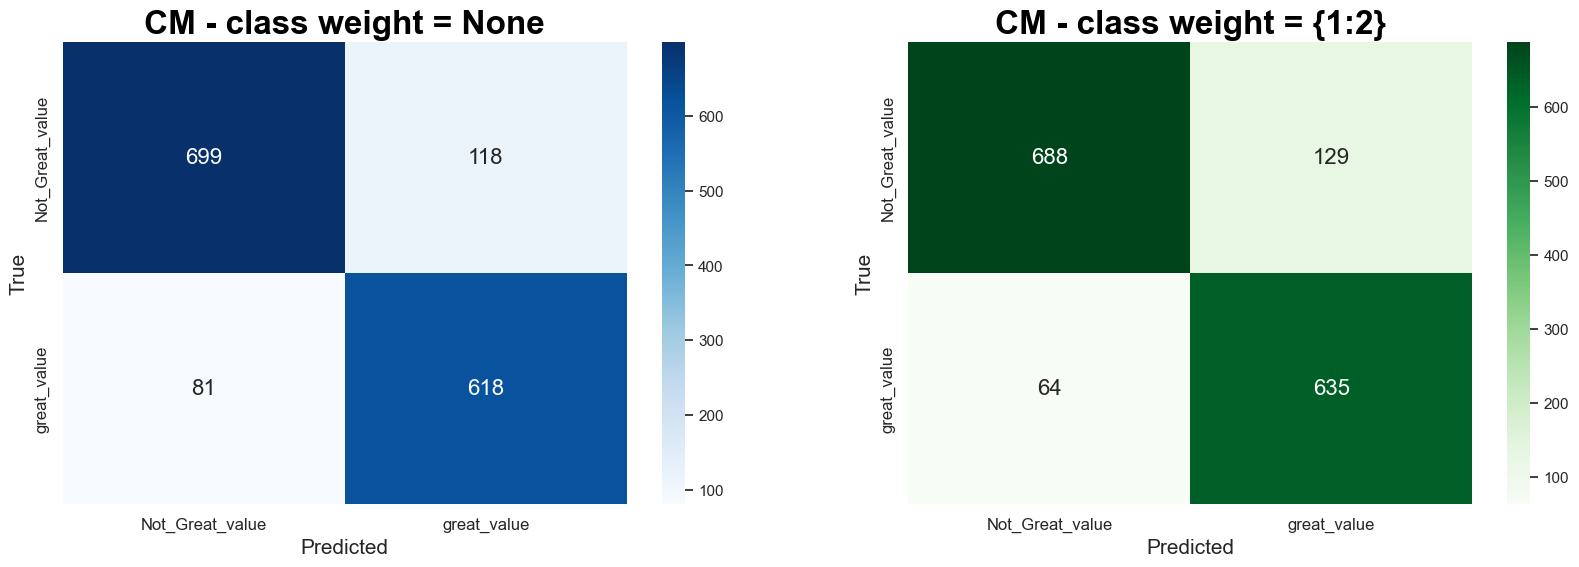

In [130]:
# comparing optimal and decision model
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = None', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = {1:2}', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt_3, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12)
chart.yaxis.set_ticklabels(['Not_Great_value', 'great_value'], fontsize=12, va='center')

<div style="background-color:#cc5500; color:white; padding:20px">
<h2>  SUMMARY OF RANDOM FOREST MODELLING </h2>
</div>

**Optimal Model Selected**:
* RandomForestClassifier(max_depth = 18, max_features = 16, n_estimators = 50, class_weight=None, criterion = 'entropy', random_state=21)
* Accuracy score - 0.86
* Recall score - 0.88
* Precision score - 0.83

**Decision Model Selected**:
* RandomForestClassifier(max_depth = 18, max_features = 16,n_estimators = 50 , class_weight={0:1, 1:3}, criterion = 'entropy', random_state=21)
* Accuracy score - 0.87
* Recall score - 0.90
* Precision score - 0.83


<div style="background-color:#434343; color:white; padding:20px; text-align:center">
    <h2>CONCLUSIONS</h2>
</div>


This project aimed to develop predictive models for Airbnb listings, focusing on two main objectives: predicting the price of new listings and identifying listings considered as great value.

 **Price Prediction**:

Lasso regression was employed to identify important features for predicting the price of new Airbnb listings. Starting with 154 features, the analysis revealed that for different alpha values, the number of features with non-zero coefficients varied, with the number of bedrooms and bathrooms consistently emerging as the most important features. Specifically, at an alpha value of 3, the model retained 47 features, achieving an accuracy score of 0.54, indicating a balance between feature reduction and model performance.

Subsequently, Ridge regression was applied using the 47 features identified by the Lasso regression. The optimal alpha value obtained through grid search was 4.85, resulting in an accuracy score of 0.55. The analysis confirmed that bedrooms, bathrooms, and accommodates were the most influential factors in determining the price of listings. The Ridge regression model demonstrated an improved ability to predict prices compared to the Lasso regression model.

**Great Value Listing Identification**:

The project also aimed to develop a predictive model to identify Airbnb listings considered as great value, which is crucial for both hosts and guests. Three different models were evaluated: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.

| Model                   | Accuracy | Recall | Precision |
|-------------------------|----------|--------|-----------|
| Logistic Regression     | 82.78%   | 85%    | 78%       |
| Decision Tree Classifier| 82%      | 85%    | 79%       |
| Random Forest Classifier| 87%      | 90%    | 83%       |

**Final Thoughts**

The project successfully developed predictive models for both pricing and identifying great value listings in Airbnb. The Random Forest Classifier emerged as the most effective model for classifying great value listings, while Ridge regression proved to be better than Lasso regression for predicting prices. Future work could explore additional features, refine model parameters, and implement other machine learning algorithms to further enhance the predictive capabilities of the models.
